<a href="https://colab.research.google.com/github/tilakn2/digital-wellbeing-analytics/blob/main/CMI_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHILD MIND INSTITUTE - EXPLORATORY DATA ANALYSIS

In today’s digital age, problematic internet use among children and adolescents is a growing concern. Better understanding this issue is crucial for addressing mental health problems such as depression and anxiety.

Current methods for measuring problematic internet use in children and adolescents are often complex and require professional assessments. This creates access, cultural, and linguistic barriers for many families. Due to these limitations, problematic internet use is often not measured directly, but is instead associated with issues such as depression and anxiety in youth.

Conversely, physical & fitness measures are extremely accessible and widely available with minimal intervention or clinical expertise. Changes in physical habits, such as poorer posture, irregular diet, and reduced physical activity, are common in excessive technology users. We propose using these easily obtainable physical fitness indicators as proxies for identifying problematic internet use, especially in contexts lacking clinical expertise or suitable assessment tools.

This notebook performs an in-depth exploratory data analysis (EDA) on the CMI dataset. The dataset includes various features related to demographics, physical health, cognitive assessments, fitness, internet usage, and psychological measures. The EDA process involves:

Data Overview: Loading and inspecting the dataset, including column categories and distributions.

Descriptive Statistics: Summary statistics to understand central tendencies, spread, and missing data patterns.

Feature Categorization: Grouping variables based on their domain (e.g., physical health, cognitive assessments, internet addiction scores).

Missing Data Analysis: Identifying missing values and assessing potential imputation strategies.

Visualizations: Generating insights through distributions, correlations, and feature relationships.

Seasonality Analysis: Exploring trends based on seasonal enrollment and assessment periods.
This EDA serves as a foundation for further data processing, modeling, and hypothesis testing.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data
#train_df=pd.read_csv('/Users/bhavanasanghi/Downloads/train.csv')
train_df=pd.read_csv('train.csv')
train_df.shape

(3960, 82)

In [ ]:
#importing the data dictionary
#data_dict=pd.read_csv('/Users/bhavanasanghi/Downloads/data_dictionary.csv')
data_dict=pd.read_csv('data_dictionary.csv')
data_dict

Instrument  \
0                           Identifier   
1                         Demographics   
2                         Demographics   
3                         Demographics   
4   Children's Global Assessment Scale   
..                                 ...   
76             Sleep Disturbance Scale   
77             Sleep Disturbance Scale   
78             Sleep Disturbance Scale   
79                        Internet Use   
80                        Internet Use   

                                     Field                       Description  \
0                                       id                  Participant's ID   
1                Basic_Demos-Enroll_Season              Season of enrollment   
2                          Basic_Demos-Age                Age of participant   
3                          Basic_Demos-Sex                Sex of participant   
4                              CGAS-Season           Season of participation   
..                                     ...                               ...   
76                              SDS-Season           Season of participation   
77                       SDS-SDS_Total_Raw                   Total Raw Score   
78                         SDS-SDS_Total_T                     Total T-Score   
79                     PreInt_EduHx-Season           Season of participation   
80  PreInt_EduHx-computerinternet_hoursday  Hours of using computer/internet   

               Type                        Values  \
0               str                           NaN   
1               str  Spring, Summer, Fall, Winter   
2             float                           NaN   
3   categorical int                           0,1   
4               str  Spring, Summer, Fall, Winter   
..              ...                           ...   
76              str  Spring, Summer, Fall, Winter   
77              int                           NaN   
78              int                           NaN   
79              str  Spring, Summer, Fall, Winter   
80  categorical int                       0,1,2,3   

                                         Value Labels  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                    0=Male, 1=Female  
4                                                 NaN  
..                                                ...  
76                                                NaN  
77                                                NaN  
78                                                NaN  
79                                                NaN  
80  0=Less than 1h/day, 1=Around 1h/day, 2=Around ...  

[81 rows x 6 columns]

In [ ]:
train_df.describe()

Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
count      3960.000000      3960.000000      2421.000000   3022.000000   
mean         10.433586         0.372727        65.454771     19.331929   
std           3.574648         0.483591        22.341862      5.113934   
min           5.000000         0.000000        25.000000      0.000000   
25%           8.000000         0.000000        59.000000     15.869350   
50%          10.000000         0.000000        65.000000     17.937682   
75%          13.000000         1.000000        75.000000     21.571244   
max          22.000000         1.000000       999.000000     59.132048   

       Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
count      3027.000000      3076.000000                    898.000000   
mean         55.946713        89.038615                     27.278508   
std           7.473764        44.569040                      5.567287   
min          33.000000         0.000000                     18.000000   
25%          50.000000        57.200000                     23.000000   
50%          55.000000        77.000000                     26.000000   
75%          62.000000       113.800000                     30.000000   
max          78.500000       315.000000                     50.000000   

       Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  ...  \
count            2954.000000         2967.000000           2954.000000  ...   
mean               69.648951           81.597236            116.983074  ...   
std                13.611226           13.665196             17.061225  ...   
min                 0.000000           27.000000              0.000000  ...   
25%                61.000000           72.000000            107.000000  ...   
50%                68.000000           81.000000            114.000000  ...   
75%                76.000000           90.500000            125.000000  ...   
max               179.000000          138.000000            203.000000  ...   

       PCIAT-PCIAT_16  PCIAT-PCIAT_17  PCIAT-PCIAT_18  PCIAT-PCIAT_19  \
count     2728.000000     2725.000000     2728.000000     2730.000000   
mean         1.452346        1.627890        1.613636        1.158974   
std          1.495600        1.445622        1.529178        1.343661   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          1.000000        1.000000        1.000000        1.000000   
75%          2.000000        3.000000        2.000000        2.000000   
max          5.000000        5.000000        5.000000        5.000000   

       PCIAT-PCIAT_20  PCIAT-PCIAT_Total  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
count     2733.000000        2736.000000        2609.000000      2606.000000   
mean         0.943652          27.896199          41.088923        57.763622   
std          1.185460          20.338853          10.427433        13.196091   
min          0.000000           0.000000          17.000000        38.000000   
25%          0.000000          12.000000          33.000000        47.000000   
50%          1.000000          26.000000          39.000000        55.000000   
75%          1.000000          41.000000          46.000000        64.000000   
max          5.000000          93.000000          96.000000       100.000000   

       PreInt_EduHx-computerinternet_hoursday          sii  
count                             3301.000000  2736.000000  
mean                                 1.060588     0.580409  
std                                  1.094875     0.771122  
min                                  0.000000     0.000000  
25%                                  0.000000     0.000000  
50%                                  1.000000     0.000000  
75%                                  2.000000     1.000000  
max                                  3.000000     3.000000  

[8 rows x 70 columns]

Helper function for summary stats of each column to be used later downstream

In [ ]:
def calculate_stats(data, columns):
    if isinstance(columns, str):
        columns = [columns]

    stats = []
    for col in columns:
        if data[col].dtype in ['object', 'category']:
            counts = data[col].value_counts(dropna=False, sort=False)
            percents = data[col].value_counts(normalize=True, dropna=False, sort=False) * 100
            formatted = counts.astype(str) + ' (' + percents.round(2).astype(str) + '%)'
            stats_col = pd.DataFrame({'count (%)': formatted})
            stats.append(stats_col)
        else:
            stats_col = data[col].describe().to_frame().transpose()
            stats_col['missing'] = data[col].isnull().sum()
            stats_col.index.name = col
            stats.append(stats_col)

    return pd.concat(stats, axis=0)

In [ ]:
#code to link different variable sub-categories to the right variables in
#the data dictionary file

groups = data_dict.groupby('Instrument')['Field'].apply(list).to_dict()

for instrument, features in groups.items():
    print(f"{instrument}: {features}\n")

Bio-electric Impedance Analysis: ['BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']

Children's Global Assessment Scale: ['CGAS-Season', 'CGAS-CGAS_Score']

Demographics: ['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']

FitnessGram Child: ['FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone']

FitnessGram Vitals and Treadmill: ['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec']

Identifier: ['id']

Internet Use: ['PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday']

P

In [ ]:
season_columns = [col for col in train_df.columns if 'Season' in col]
season_df = train_df[season_columns]
season_df

Basic_Demos-Enroll_Season CGAS-Season Physical-Season  \
0                         Fall      Winter            Fall   
1                       Summer         NaN            Fall   
2                       Summer        Fall            Fall   
3                       Winter        Fall          Summer   
4                       Spring      Summer             NaN   
...                        ...         ...             ...   
3955                      Fall      Spring            Fall   
3956                    Winter         NaN          Spring   
3957                      Fall      Spring          Winter   
3958                    Spring      Spring          Winter   
3959                    Spring         NaN          Winter   

     Fitness_Endurance-Season FGC-Season BIA-Season PAQ_A-Season PAQ_C-Season  \
0                         NaN       Fall       Fall          NaN          NaN   
1                         NaN       Fall     Winter          NaN         Fall   
2                        Fall       Fall        NaN          NaN       Summer   
3                      Summer     Summer     Summer          NaN       Winter   
4                         NaN        NaN        NaN       Summer          NaN   
...                       ...        ...        ...          ...          ...   
3955                      NaN       Fall       Fall          NaN       Winter   
3956                      NaN     Spring     Spring          NaN       Winter   
3957                      NaN     Winter     Winter          NaN       Winter   
3958                      NaN     Spring     Summer          NaN       Spring   
3959                      NaN     Winter        NaN          NaN          NaN   

     PCIAT-Season SDS-Season PreInt_EduHx-Season  
0            Fall        NaN                Fall  
1            Fall       Fall              Summer  
2            Fall       Fall              Summer  
3          Summer     Summer              Winter  
4             NaN        NaN                 NaN  
...           ...        ...                 ...  
3955       Winter     Winter                Fall  
3956          NaN        NaN              Winter  
3957       Winter     Winter                Fall  
3958       Spring     Spring              Spring  
3959          NaN        NaN              Spring  

[3960 rows x 11 columns]

Replacing all NAN values with 'missing' for explainability for univariate analysis

In [ ]:
train_df[season_columns] = train_df[season_columns].fillna("Missing")

EDA based on Children's global assessment scale variable sub-category

In [ ]:
#code to variables related to the above sub-category
groups.get("Children's Global Assessment Scale")

['CGAS-Season', 'CGAS-CGAS_Score']

In [ ]:
calculate_stats(train_df, 'CGAS-CGAS_Score')

count       mean        std   min   25%   50%   75%    max  \
CGAS-CGAS_Score                                                                
CGAS-CGAS_Score  2421.0  65.454771  22.341862  25.0  59.0  65.0  75.0  999.0   

                 missing  
CGAS-CGAS_Score           
CGAS-CGAS_Score     1539

From the above observation, we notice that max value of CGAS score is 999, which may seem like a false value entered as the mean is only 65 and 75% is 75 too

In [ ]:
train_df[train_df['CGAS-CGAS_Score']>100]

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
2065  83525bbe                      Fall               11                1   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
2065      Winter            999.0            Fall           NaN   

      Physical-Height  Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  \
2065              NaN              NaN  ...             NaN             NaN   

      PCIAT-PCIAT_20  PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  \
2065             NaN                NaN    Missing                NaN   

      SDS-SDS_Total_T  PreInt_EduHx-Season  \
2065              NaN                 Fall   

     PreInt_EduHx-computerinternet_hoursday  sii  
2065                                    3.0  NaN  

[1 rows x 82 columns]

In [ ]:
#replacing outlier value with nan
train_df.loc[train_df['CGAS-CGAS_Score'] == 999, 'CGAS-CGAS_Score'] = np.nan

Plotting CGAS season enrollment

(-1.0999991226922328,
 1.099998488321977,
 -1.0999972170339294,
 1.0999998674778062)

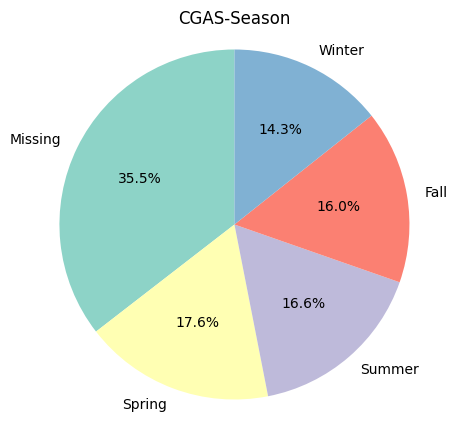

In [ ]:
plt.figure(figsize=(12, 5))

# CGAS-Season
plt.subplot(1, 2, 1)
cgas_season_counts = train_df['CGAS-Season'].value_counts(normalize=True)
plt.pie(
    cgas_season_counts,
    labels=cgas_season_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3")
)
plt.title('CGAS-Season')
plt.axis('equal')

Distribuiton of CGAS score

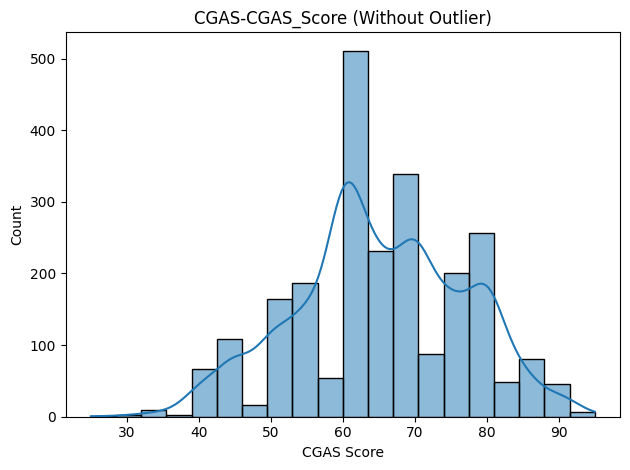

In [ ]:
sns.histplot(
    train_df['CGAS-CGAS_Score'].dropna(),
    bins=20, kde=True
) #KDE is the kernel density estimate which helps understand the underlying
#distrbution of the data by using kernel smoothing. This is done by
#calculating the pdf at each point by averaging contributions from nearby data

plt.title('CGAS-CGAS_Score (Without Outlier)')
plt.xlabel('CGAS Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

1. 35% of seasonal data while collecting CGAS scores was missing
2. CGAS score was collected almost equally across all season
3. Most participants have CGAS score between 60-70 or 60-80

Plotting SII vs CGAS score to see how the score varies by dependent column

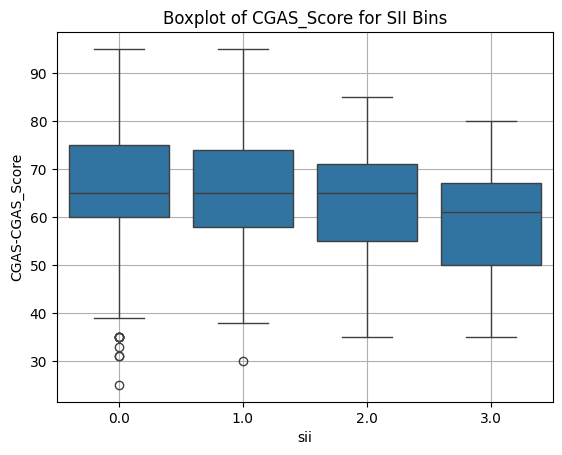

In [ ]:
sns.boxplot(x='sii', y='CGAS-CGAS_Score', data=train_df)
plt.title("Boxplot of CGAS_Score for SII Bins")
plt.grid(True)
plt.show()



In [ ]:
score_min_max = train_df.groupby('sii')['CGAS-CGAS_Score'].agg(['min', 'max'])
score_min_max = score_min_max.rename(
    columns={'min': 'Minimum CGAS Score', 'max': 'Maximum CGAS Score'}
)
score_min_max

Minimum CGAS Score  Maximum CGAS Score
sii                                        
0.0                25.0                95.0
1.0                30.0                95.0
2.0                35.0                85.0
3.0                35.0                80.0

1. According to the graph, we can say that higher the CGAS values, lower the sii, but there is very little variability.
2. According to the table above, SII bucket 0 and 1 has the lowest and highest CGAS score that is present in the data. Which means that, impairment in children might not be directly related to the CGAS factor.
3. This variable would need further investigation

To better understand the conclusion drawn above, let's explore CGAS column vs hours of internet used per day

In [ ]:
train_df[train_df['CGAS-CGAS_Score']<40][
    ['Basic_Demos-Age', 'Basic_Demos-Sex', 'sii',
     'CGAS-CGAS_Score',
     'PreInt_EduHx-computerinternet_hoursday']
]


Basic_Demos-Age  Basic_Demos-Sex  sii  CGAS-CGAS_Score  \
166                 7                0  0.0             35.0   
426                13                0  0.0             35.0   
436                19                0  0.0             39.0   
805                 6                0  0.0             35.0   
1320                5                0  1.0             38.0   
2058               11                0  2.0             35.0   
2410               20                0  0.0             39.0   
2417                9                1  0.0             31.0   
2525               13                1  1.0             30.0   
2555               15                0  0.0             33.0   
2721                9                0  0.0             35.0   
2731               15                0  3.0             38.0   
2860               12                1  3.0             35.0   
2938               12                1  0.0             35.0   
3332               12                0  0.0             25.0   
3638                6                1  2.0             35.0   
3858               15                0  0.0             31.0   

      PreInt_EduHx-computerinternet_hoursday  
166                                      NaN  
426                                      0.0  
436                                      3.0  
805                                      0.0  
1320                                     2.0  
2058                                     0.0  
2410                                     2.0  
2417                                     0.0  
2525                                     0.0  
2555                                     2.0  
2721                                     0.0  
2731                                     2.0  
2860                                     3.0  
2938                                     0.0  
3332                                     2.0  
3638                                     0.0  
3858                                     3.0

In [ ]:
train_df[train_df['CGAS-CGAS_Score']>90][
    ['Basic_Demos-Age', 'Basic_Demos-Sex', 'sii',
     'CGAS-CGAS_Score',
     'PreInt_EduHx-computerinternet_hoursday']
]

Basic_Demos-Age  Basic_Demos-Sex  sii  CGAS-CGAS_Score  \
310                13                1  0.0             91.0   
591                10                1  0.0             93.0   
667                13                0  0.0             95.0   
910                10                1  0.0             91.0   
1007               14                0  1.0             95.0   
1157               14                1  1.0             91.0   
1640               11                1  0.0             92.0   
2342                6                1  0.0             91.0   
2668               14                1  0.0             92.0   
2675               11                0  0.0             91.0   
2926                7                0  0.0             95.0   
3165               17                1  0.0             91.0   
3467               15                1  0.0             91.0   
3484               14                0  1.0             91.0   
3713                7                1  0.0             95.0   
3749               10                1  1.0             91.0   

      PreInt_EduHx-computerinternet_hoursday  
310                                      2.0  
591                                      NaN  
667                                      0.0  
910                                      0.0  
1007                                     0.0  
1157                                     2.0  
1640                                     0.0  
2342                                     0.0  
2668                                     0.0  
2675                                     0.0  
2926                                     0.0  
3165                                     1.0  
3467                                     0.0  
3484                                     3.0  
3713                                     0.0  
3749                                     2.0

The distribution of internet usage for those with very high CGAS score and very low CGAS scores is almost similar. This makes it hard to draw a clear conlclusion about the importance and relationship between CGAS and sii, internet usage columns etc

CGAS scores by age

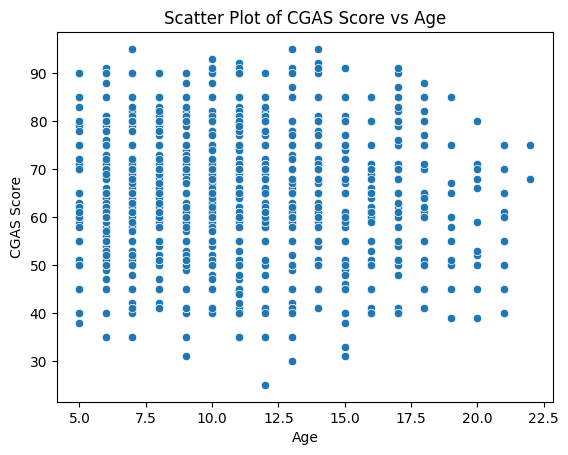

In [ ]:
sns.scatterplot(data=train_df, x='Basic_Demos-Age', y='CGAS-CGAS_Score')
plt.title('Scatter Plot of CGAS Score vs Age')
plt.xlabel('Age')
plt.ylabel('CGAS Score')
plt.show()


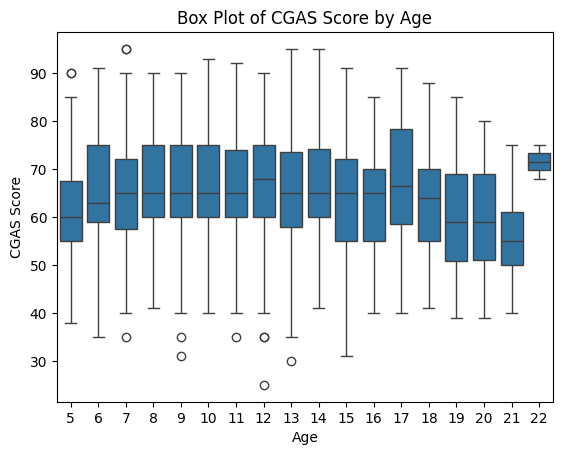

In [ ]:
sns.boxplot(data=train_df, x='Basic_Demos-Age', y='CGAS-CGAS_Score')
plt.title('Box Plot of CGAS Score by Age')
plt.xlabel('Age')
plt.ylabel('CGAS Score')
plt.show()


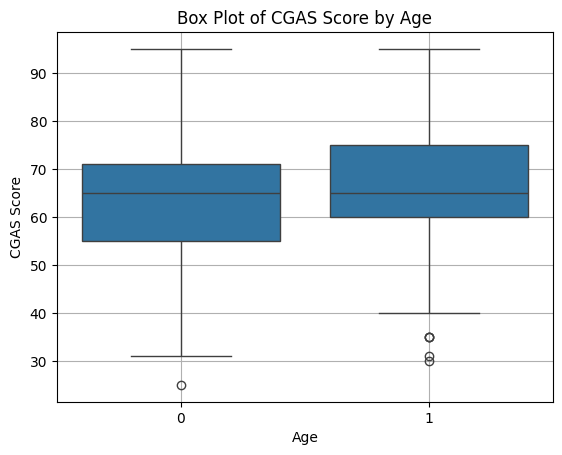

In [ ]:
sns.boxplot(data=train_df, x='Basic_Demos-Sex', y='CGAS-CGAS_Score')
plt.title('Box Plot of CGAS Score by Age')
plt.xlabel('Age')
plt.ylabel('CGAS Score')
plt.grid(True)
plt.show()

While CGAS vs age does not give us any information, we can see that CGAS scores are slightly higher for females compared to males

<ipython-input-26-faaa580f767d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cgas_by_sex_age = train_df.groupby(['Basic_Demos-Sex', 'Age Bin'])['CGAS-CGAS_Score'].mean().reset_index()


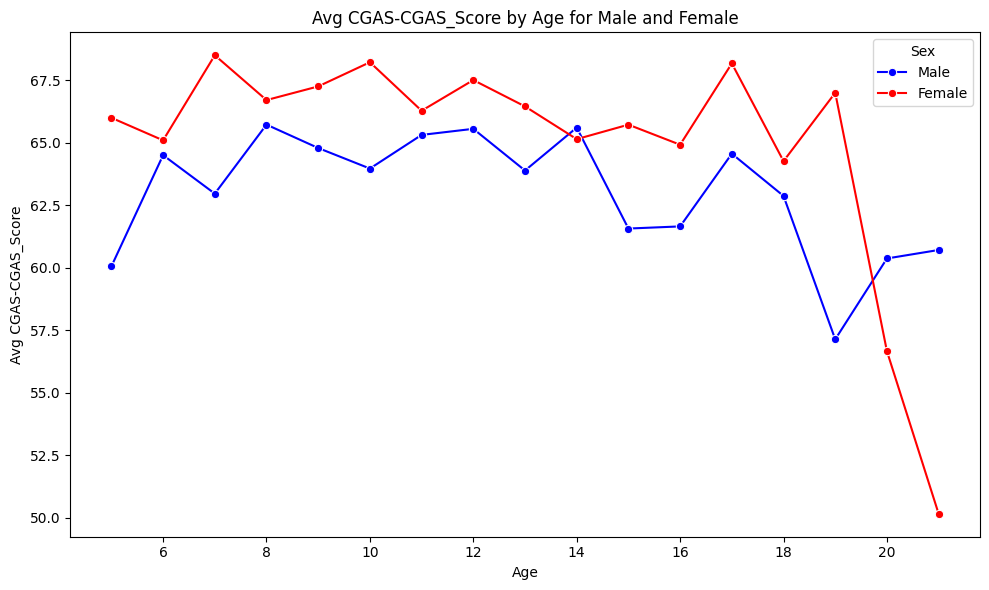

In [ ]:
#demographic_data_clean = demographic_data[demographic_data['sii'].notnull() & demographic_data['Basic_Demos-Age'].notnull()]

# Binning ages between 5 and 22
bins = np.arange(5, 23, 1)  # Creates bins from 5 to 22
labels = bins[:-1]  # Bin labels for x-axis (5 to 21)

# Categorize ages into bins
train_df['Age Bin'] = pd.cut(train_df['Basic_Demos-Age'], bins=bins, right=False, labels=labels)

# Group by sex and age bin, and calculate the average CGAS for each group
avg_cgas_by_sex_age = train_df.groupby(['Basic_Demos-Sex', 'Age Bin'])['CGAS-CGAS_Score'].mean().reset_index()

# Create separate dataframes for Male and Female
avg_cgas_male = avg_cgas_by_sex_age[avg_cgas_by_sex_age['Basic_Demos-Sex'] == 0]
avg_cgas_female = avg_cgas_by_sex_age[avg_cgas_by_sex_age['Basic_Demos-Sex'] == 1]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting line for Male
sns.lineplot(data=avg_cgas_male, x='Age Bin', y='CGAS-CGAS_Score', label='Male', marker='o', color='blue')

# Plotting line for Female
sns.lineplot(data=avg_cgas_female, x='Age Bin', y='CGAS-CGAS_Score', label='Female', marker='o', color='red')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Avg CGAS-CGAS_Score')
plt.title('Avg CGAS-CGAS_Score by Age for Male and Female')

# Display the legend
plt.legend(title='Sex')

# Show the plot
plt.tight_layout()
plt.show()

The avg CGAS score remains higher for females from childhood until around 19, after which the CGAS score for females drop suddenly

Understading what CGAS means

CGAS is a rating of general functioning for children and young people aged 4-16 years old. The CGAS asks the clinician to rate the child from 1 to 100 based on their lowest level of functioning, regardless of treatment or prognosis, over a specified time period.

We can try binning CGAS scores to enhance interpretation - https://www.corc.uk.net/outcome-experience-measures/childrens-global-assessment-scale-cgas/

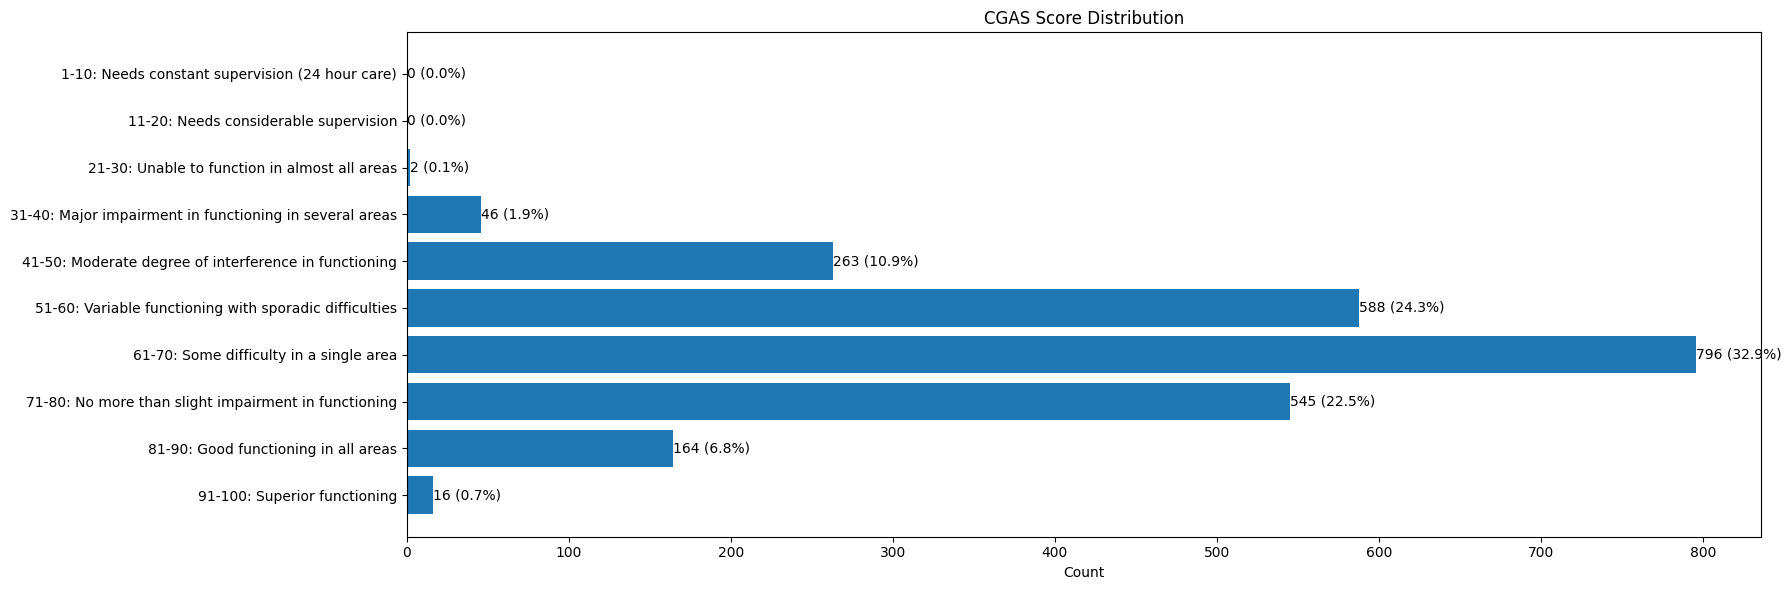

In [ ]:
bins = np.arange(0, 101, 10)
labels = [
    "1-10: Needs constant supervision (24 hour care)",
    "11-20: Needs considerable supervision",
    "21-30: Unable to function in almost all areas",
    "31-40: Major impairment in functioning in several areas",
    "41-50: Moderate degree of interference in functioning",
    "51-60: Variable functioning with sporadic difficulties",
    "61-70: Some difficulty in a single area",
    "71-80: No more than slight impairment in functioning",
    "81-90: Good functioning in all areas",
    "91-100: Superior functioning"
]

train_df['CGAS_Score_Bin'] = pd.cut(
    train_df['CGAS-CGAS_Score'], bins=bins, labels=labels
)

counts = train_df['CGAS_Score_Bin'].value_counts().reindex(labels)
prop = (counts / counts.sum() * 100).round(1)
count_prop_labels = counts.astype(str) + " (" + prop.astype(str) + "%)"

plt.figure(figsize=(18, 6))
bars = plt.barh(labels, counts)
plt.xlabel('Count')
plt.title('CGAS Score Distribution')

for bar, label in zip(bars, count_prop_labels):
    plt.text(
        bar.get_width(), bar.get_y() + bar.get_height() / 2, label, va='center'
    )

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

1. 2 participants in the 21-30 bucket have high difficulty in functioning

EDA based on physical measures variable

In [ ]:
#code to variables related to the above sub-category
groups.get("Physical Measures")

['Physical-Season',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP']

In [ ]:
calculate_stats(train_df, 'Physical-BMI')

count       mean       std  min       25%        50%  \
Physical-BMI                                                          
Physical-BMI  3022.0  19.331929  5.113934  0.0  15.86935  17.937682   

                    75%        max  missing  
Physical-BMI                                 
Physical-BMI  21.571244  59.132048      938

In [ ]:
train_df['Physical-BMI'].describe()

count    3022.000000
mean       19.331929
std         5.113934
min         0.000000
25%        15.869350
50%        17.937682
75%        21.571244
max        59.132048
Name: Physical-BMI, dtype: float64

In [ ]:
train_df[train_df['Physical-BMI']>40][['Basic_Demos-Age'
    ,'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP']]

Basic_Demos-Age  Physical-BMI  Physical-Height  Physical-Weight  \
306                16     46.102914            67.50            298.8   
632                12     40.399621            65.00            242.8   
921                16     53.918413            62.50            299.6   
1029               16     40.676514            64.00            237.0   
1212               21     47.603772            65.40            289.6   
1517               15     43.188304            57.00            199.6   
1520               18     40.328720            64.60            239.4   
1611               14     44.835548            51.75            170.8   
2112               16     45.306026            68.50            302.4   
2215               14     44.829216            66.50            282.0   
2691               18     40.234131            62.00            220.0   
2854               10     44.554097            47.00            140.0   
2880               20     43.337699            70.50            306.4   
3270               16     41.554701            73.00            315.0   
3297               22     40.898793            65.00            245.8   
3456                7     43.468833            60.00            222.6   
3818                8     59.132048            33.00             91.6   

      Physical-Waist_Circumference  Physical-Diastolic_BP  Physical-HeartRate  \
306                           49.0                   72.0                93.0   
632                           50.0                   79.0                81.0   
921                            NaN                    NaN                 NaN   
1029                          43.0                   97.0                73.0   
1212                          48.0                   88.0                88.0   
1517                           NaN                  101.0                77.0   
1520                          46.0                   86.0               104.0   
1611                           NaN                   76.0                80.0   
2112                           NaN                   80.0                69.0   
2215                          49.0                   80.0                99.0   
2691                           NaN                   76.0                71.0   
2854                           NaN                   75.0                60.0   
2880                          50.0                   54.0                68.0   
3270                           NaN                   50.0                74.0   
3297                           NaN                   95.0               120.0   
3456                           NaN                   78.0               111.0   
3818                          33.0                   84.0                98.0   

      Physical-Systolic_BP  
306                  157.0  
632                  126.0  
921                    NaN  
1029                 171.0  
1212                 139.0  
1517                 147.0  
1520                 149.0  
1611                 140.0  
2112                 131.0  
2215                 152.0  
2691                 131.0  
2854                 124.0  
2880                 122.0  
3270                 133.0  
3297                 144.0  
3456                 116.0  
3818                 112.0

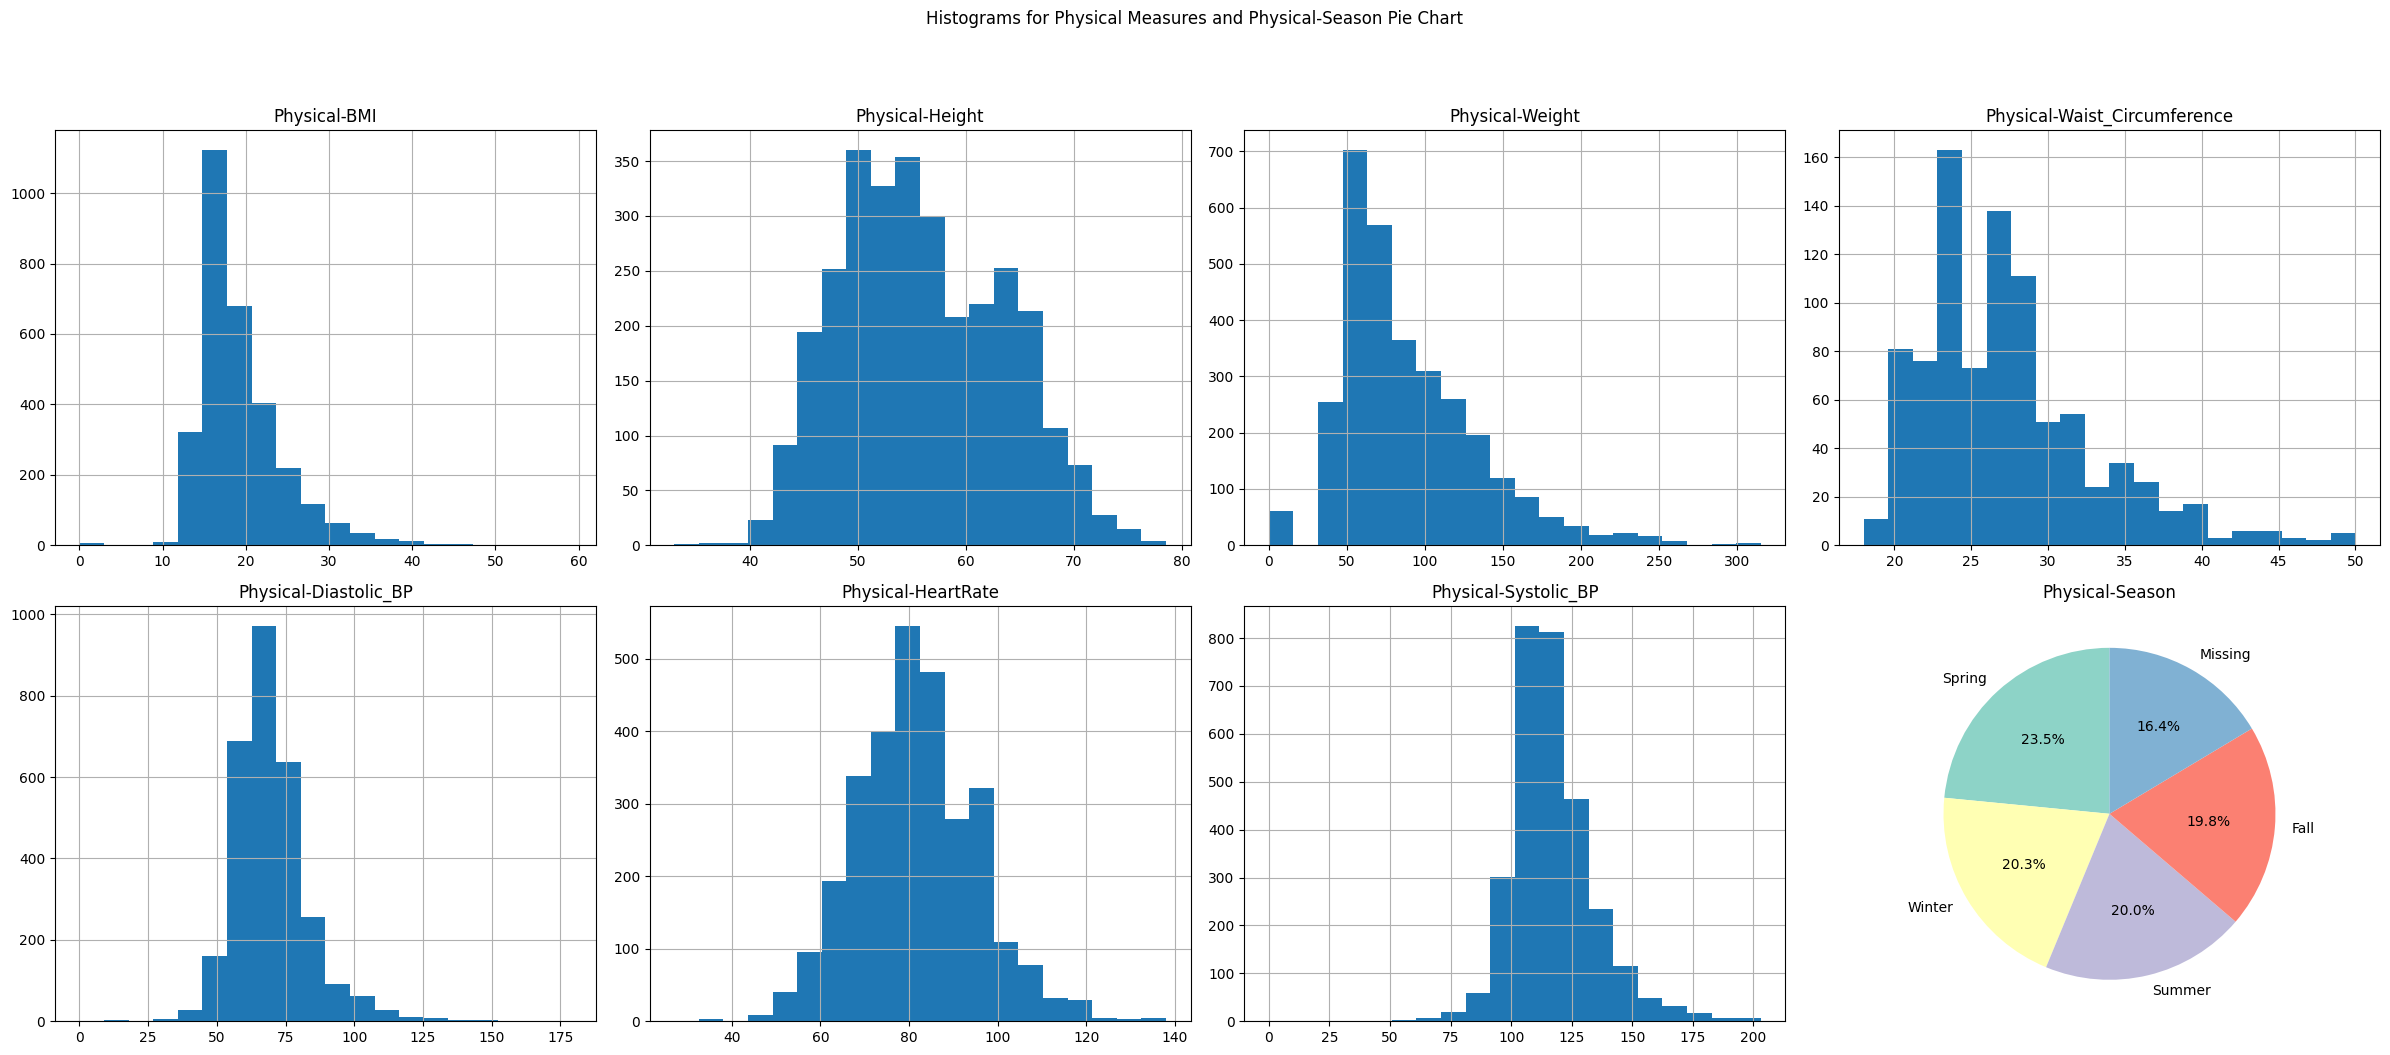

In [ ]:
features_physical = groups.get('Physical Measures', [])
cols = [col for col in features_physical if col!='Physical-Season']

plt.figure(figsize=(24, 10))
n_cols = 4
n_rows = len(cols) // n_cols + 1

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    train_df[col].hist(bins=20)
    plt.title(col)

plt.subplot(n_rows, n_cols, len(cols) + 1)
season_counts = train_df['Physical-Season'].value_counts(dropna=False)
plt.pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3")
)
plt.title('Physical-Season')

plt.suptitle('Histograms for Physical Measures and Physical-Season Pie Chart', y=1.05)
plt.tight_layout()
plt.show()

1. Variables like BMI and Weight have 0 values, which do not realistically make sense. There are also some extreme values for BMI and Weight
2. Diastolic BP values go below 25 and above 125, which do not seem realistic or seem too extreme to be true in children and teenagers
3. Systolic BP values go below 75 and above 175, which seem extreme. Important point here is that, values of systolic can never be lower than diastolic BP, these observations must be taken care of.

In [ ]:
wh_cols = [
    'Physical-BMI', 'Physical-Height',
    'Physical-Weight', 'Physical-Waist_Circumference','Physical-Diastolic_BP','Physical-Systolic_BP'
]
(train_df[wh_cols] == 0).sum()

Physical-BMI                     7
Physical-Height                  0
Physical-Weight                 61
Physical-Waist_Circumference     0
Physical-Diastolic_BP            1
Physical-Systolic_BP             1
dtype: int64

These 0 values cannot realistically exist, so for now we replace them with NAN

In [ ]:
train_df[wh_cols] = train_df[wh_cols].replace(0, np.nan)

Checking for observations where systolic BP is lower than diastolic BP

In [ ]:
train_df[train_df['Physical-Systolic_BP'] <= train_df['Physical-Diastolic_BP']][[
    'Physical-Diastolic_BP', 'Physical-Systolic_BP',
    'Physical-HeartRate'
]]

Physical-Diastolic_BP  Physical-Systolic_BP  Physical-HeartRate
1140                  179.0                 139.0               103.0
1879                  117.0                 114.0               114.0
2386                   76.0                  76.0               116.0
3344                   98.0                  73.0                96.0

These measurements are incorrect. But it is difficult to manually inspect these observations as we don't know which information is correct. So we can switch both BP values to nan in this case

In [ ]:
train_df.loc[train_df['Physical-Systolic_BP'] <= train_df['Physical-Diastolic_BP'], [
    'Physical-Diastolic_BP', 'Physical-Systolic_BP',
    'Physical-HeartRate'
]] = np.nan

To check for correlation between waist circumference and weight

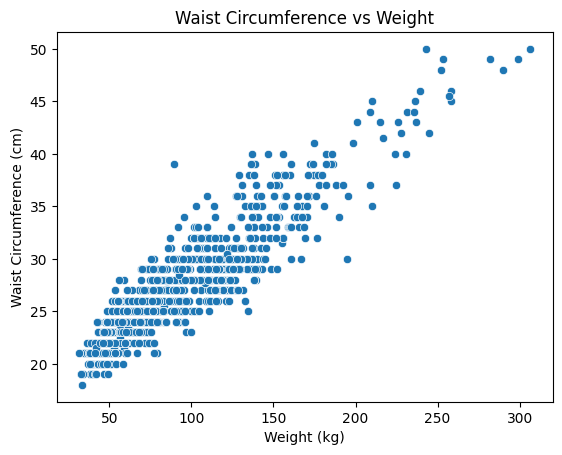

In [ ]:
sns.scatterplot(x='Physical-Weight', y='Physical-Waist_Circumference', data=train_df)
plt.title('Waist Circumference vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Waist Circumference (cm)')
plt.show()


As expected, waist is highly correlated with weight. We can drop one of these variables for modelling

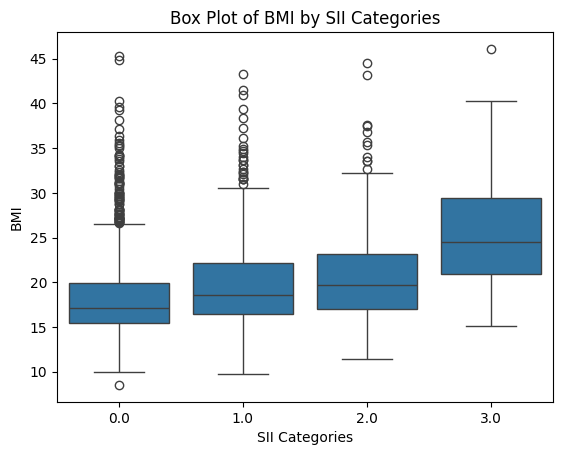

In [ ]:
sns.boxplot(data=train_df, x='sii', y='Physical-BMI')
plt.title('Box Plot of BMI by SII Categories')
plt.xlabel('SII Categories')
plt.ylabel('BMI')
plt.show()


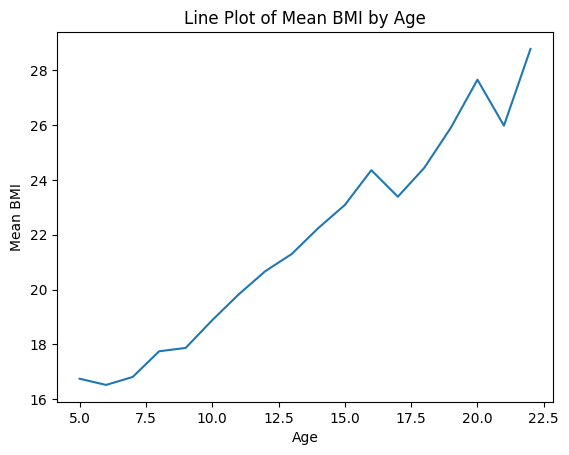

In [ ]:
mean_bmi = train_df.groupby('Basic_Demos-Age')['Physical-BMI'].mean().reset_index()
sns.lineplot(data=mean_bmi, x='Basic_Demos-Age', y='Physical-BMI')
plt.title('Line Plot of Mean BMI by Age')
plt.xlabel('Age')
plt.ylabel('Mean BMI')
plt.show()


From the above plot, we can see that as age increases, BMI increases, which is obvious because the height and weight of children would increase as they grow.
Because of this, it is hard to tell if higher SII values can be related to high BMI values. This would need to be further investigated.

BMI vs sex

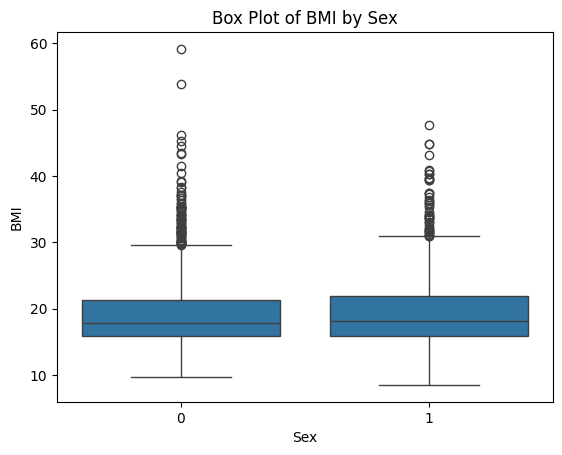

In [ ]:
sns.boxplot(data=train_df, x='Basic_Demos-Sex', y='Physical-BMI')
plt.title('Box Plot of BMI by Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()


The BMI levels for male and female seem similar

In [ ]:
print(train_df[train_df['Basic_Demos-Sex']==0]['Physical-BMI'].mean())
print(train_df[train_df['Basic_Demos-Sex']==1]['Physical-BMI'].mean())

19.262110110150754
19.577070540026412


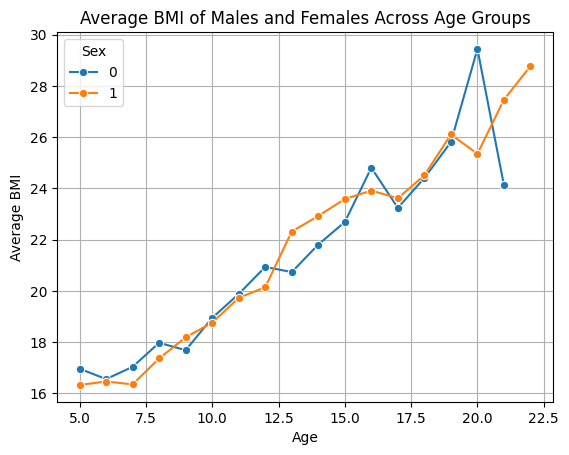

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Age and Sex to calculate average BMI
age_sex_bmi = train_df.groupby(['Basic_Demos-Age', 'Basic_Demos-Sex'])['Physical-BMI'].mean().reset_index()

# Line plot for average BMI by Age and Sex
sns.lineplot(data=age_sex_bmi, x='Basic_Demos-Age', y='Physical-BMI', hue='Basic_Demos-Sex', marker='o')

# Customizing the plot
plt.title('Average BMI of Males and Females Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.legend(title='Sex')
plt.grid(True)
plt.show()


From this graph we see that, the avg BMI for males around age 20 and 16 is higher than that of females. Apart from that, males and females have similar avg BMI

Text(0, 0.5, 'Physical-BMI')

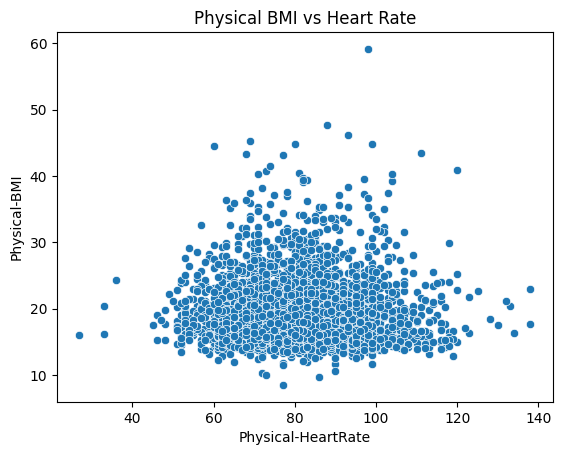

In [ ]:
sns.scatterplot(x='Physical-HeartRate', y='Physical-BMI', data=train_df)
plt.title('Physical BMI vs Heart Rate')
plt.xlabel('Physical-HeartRate')
plt.ylabel('Physical-BMI')

There does not seem to be a clear correlation between heart rate and BMI

Systolic BP vs Diastolic BP

Text(0, 0.5, 'Physical-Systolic_BP')

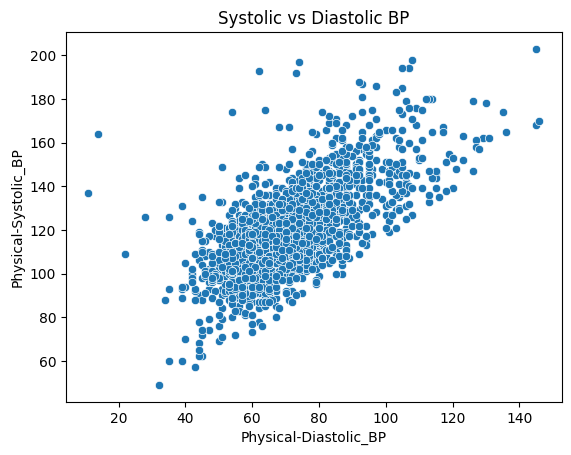

In [ ]:
sns.scatterplot(x='Physical-Diastolic_BP', y='Physical-Systolic_BP', data=train_df)
plt.title('Systolic vs Diastolic BP')
plt.xlabel('Physical-Diastolic_BP')
plt.ylabel('Physical-Systolic_BP')

As expected, we see a positive correlation between systolic and diastolic BP

Diastolic BP vs BMI

Text(0, 0.5, 'Physical-BMI')

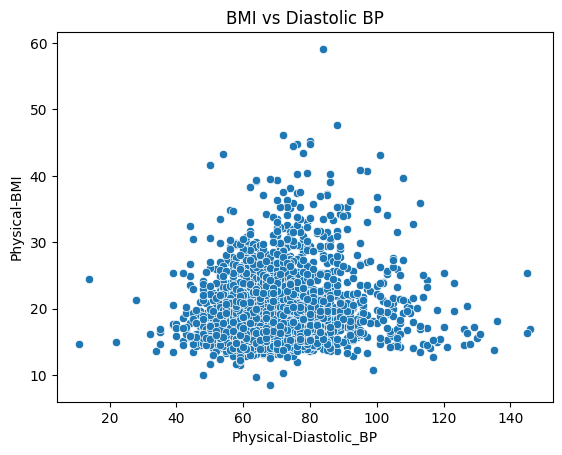

In [ ]:
sns.scatterplot(x='Physical-Diastolic_BP', y='Physical-BMI', data=train_df)
plt.title('BMI vs Diastolic BP')
plt.xlabel('Physical-Diastolic_BP')
plt.ylabel('Physical-BMI')

Systolic BP vs BMI

Text(0, 0.5, 'Physical-BMI')

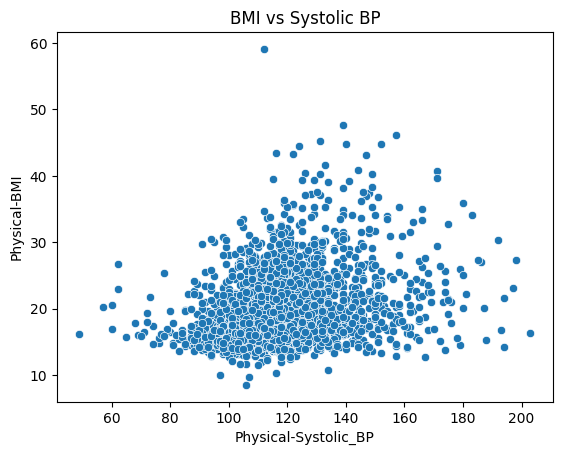

In [ ]:
sns.scatterplot(x='Physical-Systolic_BP', y='Physical-BMI', data=train_df)
plt.title('BMI vs Systolic BP')
plt.xlabel('Physical-Systolic_BP')
plt.ylabel('Physical-BMI')

Inspired from another notebook - To compare our observations to normal values

According to the WHO website, below are the ranges for different BMI categories

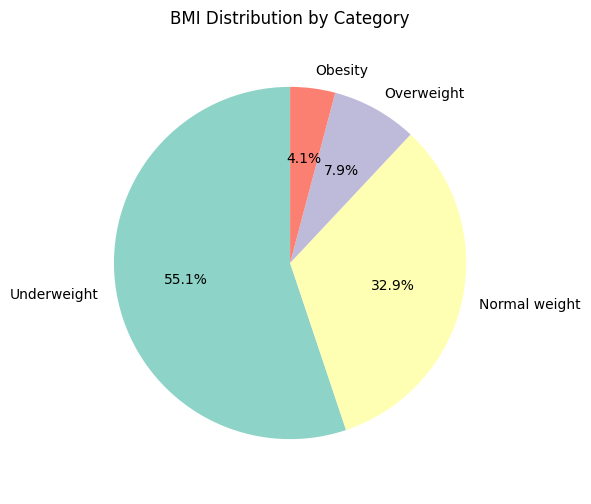

In [ ]:
bmi_categories = [
    ('Underweight', train_df['Physical-BMI'] < 18.5),
    ('Normal weight', (train_df['Physical-BMI'] >= 18.5) & (train_df['Physical-BMI'] <= 24.9)),
    ('Overweight', (train_df['Physical-BMI'] >= 25) & (train_df['Physical-BMI'] <= 29.9)),
    ('Obesity', train_df['Physical-BMI'] >= 30)
]

bmi_category_counts = {label: condition.sum() for label, condition in bmi_categories}

plt.figure(figsize=(5, 6))
plt.pie(bmi_category_counts.values(),
        labels=bmi_category_counts.keys(),
        autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Set3.colors)
plt.title('BMI Distribution by Category')
plt.axis('equal')
plt.show()

Deep diving into these extreme cases

In [ ]:
train_df[train_df['Physical-BMI'] > 40][cols + ['Basic_Demos-Age']]

Physical-BMI  Physical-Height  Physical-Weight  \
306      46.102914            67.50            298.8   
632      40.399621            65.00            242.8   
921      53.918413            62.50            299.6   
1029     40.676514            64.00            237.0   
1212     47.603772            65.40            289.6   
1517     43.188304            57.00            199.6   
1520     40.328720            64.60            239.4   
1611     44.835548            51.75            170.8   
2112     45.306026            68.50            302.4   
2215     44.829216            66.50            282.0   
2691     40.234131            62.00            220.0   
2854     44.554097            47.00            140.0   
2880     43.337699            70.50            306.4   
3270     41.554701            73.00            315.0   
3297     40.898793            65.00            245.8   
3456     43.468833            60.00            222.6   
3818     59.132048            33.00             91.6   

      Physical-Waist_Circumference  Physical-Diastolic_BP  Physical-HeartRate  \
306                           49.0                   72.0                93.0   
632                           50.0                   79.0                81.0   
921                            NaN                    NaN                 NaN   
1029                          43.0                   97.0                73.0   
1212                          48.0                   88.0                88.0   
1517                           NaN                  101.0                77.0   
1520                          46.0                   86.0               104.0   
1611                           NaN                   76.0                80.0   
2112                           NaN                   80.0                69.0   
2215                          49.0                   80.0                99.0   
2691                           NaN                   76.0                71.0   
2854                           NaN                   75.0                60.0   
2880                          50.0                   54.0                68.0   
3270                           NaN                   50.0                74.0   
3297                           NaN                   95.0               120.0   
3456                           NaN                   78.0               111.0   
3818                          33.0                   84.0                98.0   

      Physical-Systolic_BP  Basic_Demos-Age  
306                  157.0               16  
632                  126.0               12  
921                    NaN               16  
1029                 171.0               16  
1212                 139.0               21  
1517                 147.0               15  
1520                 149.0               18  
1611                 140.0               14  
2112                 131.0               16  
2215                 152.0               14  
2691                 131.0               18  
2854                 124.0               10  
2880                 122.0               20  
3270                 133.0               16  
3297                 144.0               22  
3456                 116.0                7  
3818                 112.0                8

Diving deep age and sex category wise to check how many BMI values are extreme values

For Males:
1. Age 5: Underweight <14.0, Normal 14.0-16.8, Overweight 16.9-17.9, Obese ≥18.0
2. Age 10: Underweight <14.5, Normal 14.5-19.3, Overweight 19.4-22.1, Obese ≥22.2
3. Age 15: Underweight <16.5, Normal 16.5-22.7, Overweight 22.8-26.8, Obese ≥26.9
4. Age 20: Underweight <18.5, Normal 18.5-24.9, Overweight 25.0-29.9, Obese ≥30.0



For Females:
1. Age 5: Underweight <13.8, Normal 13.8-16.8, Overweight 16.9-18.2, Obese ≥18.3
2. Age 10: Underweight <14.2, Normal 14.2-19.9, Overweight 20.0-23.0, Obese ≥23.1
3. Age 15: Underweight <16.8, Normal 16.8-23.5, Overweight 23.6-28.1, Obese ≥28.2
4. Age 20: Underweight <18.5, Normal 18.5-24.9, Overweight 25.0-29.9, Obese ≥30.0

In [ ]:
# Define BMI ranges
bmi_ranges = {
        5: {"extremely_underweight": 13.0, "extremely_overweight": 20.0},
        10: {"extremely_underweight": 13.5, "extremely_overweight": 25.0},
        15: {"extremely_underweight": 15.0, "extremely_overweight": 30.0},
        20: {"extremely_underweight": 16.5, "extremely_overweight": 35.0},
    }

# Age groups and sex
age_groups = [5, 10, 15, 20, 100]

# Loop through age groups and sex
for i in range(len(age_groups) - 1):
        age_lower = age_groups[i]
        age_upper = age_groups[i+1]

        # Handle the "above 20" condition separately for age > 20
        if age_upper == 100:
            age_upper = float('inf')

        # Count extremely underweight individuals based on the dynamic age range and sex
        count = train_df[
            (train_df['Basic_Demos-Age'] >= age_lower) &
            (train_df['Basic_Demos-Age'] < age_upper) &
            (train_df['Physical-BMI'] < bmi_ranges[age_groups[i]]["extremely_underweight"])
        ].shape[0]

        if age_upper == float('inf'):
                print(f'Count of extremely underweight participants above age 20 are {count}')
        else:
                print(f'Count of extremely underweight participants of age {age_lower}-{age_upper-1} are {count}')


# Loop through age groups and sex
for i in range(len(age_groups) - 1):
        age_lower = age_groups[i]
        age_upper = age_groups[i+1]

        # Handle the "above 20" condition separately for age > 20
        if age_upper == 100:
            age_upper = float('inf')

        # Count extremely underweight individuals based on the dynamic age range and sex
        count = train_df[
            (train_df['Basic_Demos-Age'] >= age_lower) &
            (train_df['Basic_Demos-Age'] < age_upper) &
            (train_df['Physical-BMI'] > bmi_ranges[age_groups[i]]["extremely_overweight"])
        ].shape[0]

        if age_upper == float('inf'):
                print(f'Count of extremely overweight participants above age 20 are {count}')
        else:
                print(f'Count of extremely overweight participants of age {age_lower}-{age_upper-1} are {count}')





Count of extremely underweight participants of age 5-9 are 21
Count of extremely underweight participants of age 10-14 are 10
Count of extremely underweight participants of age 15-19 are 0
Count of extremely underweight participants above age 20 are 0
Count of extremely overweight participants of age 5-9 are 208
Count of extremely overweight participants of age 10-14 are 177
Count of extremely overweight participants of age 15-19 are 51
Count of extremely overweight participants above age 20 are 5


In [ ]:
# Define BMI ranges for each age group
bmi_ranges = {
    5: {"extremely_underweight": 13.0, "extremely_overweight": 20.0},
    10: {"extremely_underweight": 13.5, "extremely_overweight": 25.0},
    15: {"extremely_underweight": 15.0, "extremely_overweight": 30.0},
    20: {"extremely_underweight": 16.5, "extremely_overweight": 35.0},
}

# Age groups and sex
age_groups = [5, 10, 15, 20, 100]  # Add 100 to indicate age > 20

# Loop through age groups
for i in range(len(age_groups) - 1):
    age_lower = age_groups[i]
    age_upper = age_groups[i + 1]

    # Handle the "above 20" condition separately for age > 20
    if age_upper == 100:
        age_upper = float('inf')  # Age > 20, we use infinity as the upper bound

    # Total participants in each age group
    total_count = train_df[
        (train_df['Basic_Demos-Age'] >= age_lower) &
        (train_df['Basic_Demos-Age'] < age_upper)
    ].shape[0]

    # Count of extremely underweight individuals in the current age group
    underweight_count = train_df[
        (train_df['Basic_Demos-Age'] >= age_lower) &
        (train_df['Basic_Demos-Age'] < age_upper) &
        (train_df['Physical-BMI'] < bmi_ranges[age_groups[i]]["extremely_underweight"])
    ].shape[0]

    # Count of extremely overweight individuals in the current age group
    overweight_count = train_df[
        (train_df['Basic_Demos-Age'] >= age_lower) &
        (train_df['Basic_Demos-Age'] < age_upper) &
        (train_df['Physical-BMI'] > bmi_ranges[age_groups[i]]["extremely_overweight"])
    ].shape[0]

    # Calculate percentages for underweight and overweight participants
    if total_count > 0:
        underweight_percentage = (underweight_count / total_count) * 100
        overweight_percentage = (overweight_count / total_count) * 100
    else:
        underweight_percentage = 0
        overweight_percentage = 0

    # Print the results
    if age_upper == float('inf'):
        print(f'Percentage of extremely underweight participants above age 20: {underweight_percentage:.2f}%')
        print(f'Percentage of extremely overweight participants above age 20: {overweight_percentage:.2f}%')
    else:
        print(f'Percentage of extremely underweight participants of age {age_lower}-{age_upper - 1}: {underweight_percentage:.2f}%')
        print(f'Percentage of extremely overweight participants of age {age_lower}-{age_upper - 1}: {overweight_percentage:.2f}%')



Percentage of extremely underweight participants of age 5-9: 1.12%
Percentage of extremely overweight participants of age 5-9: 11.10%
Percentage of extremely underweight participants of age 10-14: 0.68%
Percentage of extremely overweight participants of age 10-14: 11.95%
Percentage of extremely underweight participants of age 15-19: 0.00%
Percentage of extremely overweight participants of age 15-19: 9.38%
Percentage of extremely underweight participants above age 20: 0.00%
Percentage of extremely overweight participants above age 20: 8.20%


1. We deep dived into extreme BMI cases by looking into age specific BMI values. Male and Female BMI values do not have very differing values. So, for the sake of simplicity, we kept the deep dive according to age groups only
2. When looked at age wise, the number of participants falling into extreme cases do not look very high.

These vairables do seem to have high correlation - for example physical height, physical weight and BMI.

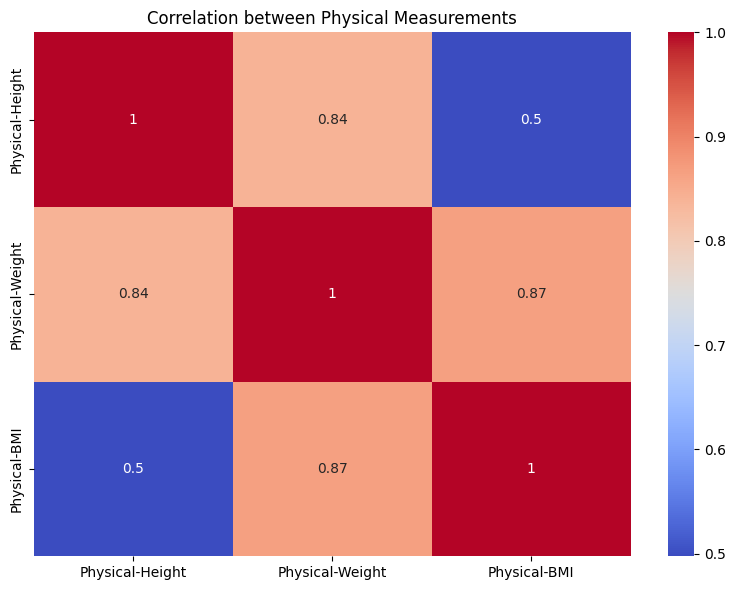

In [ ]:
# Create correlation plot between Physical measurements
physical_cols = ['Physical-Height', 'Physical-Weight', 'Physical-BMI']
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[physical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Physical Measurements')
plt.tight_layout()
plt.show()

There seems to be a high correlation between these 3 variables. We can drop height and weight columns and take BMI column for downstream modelling process

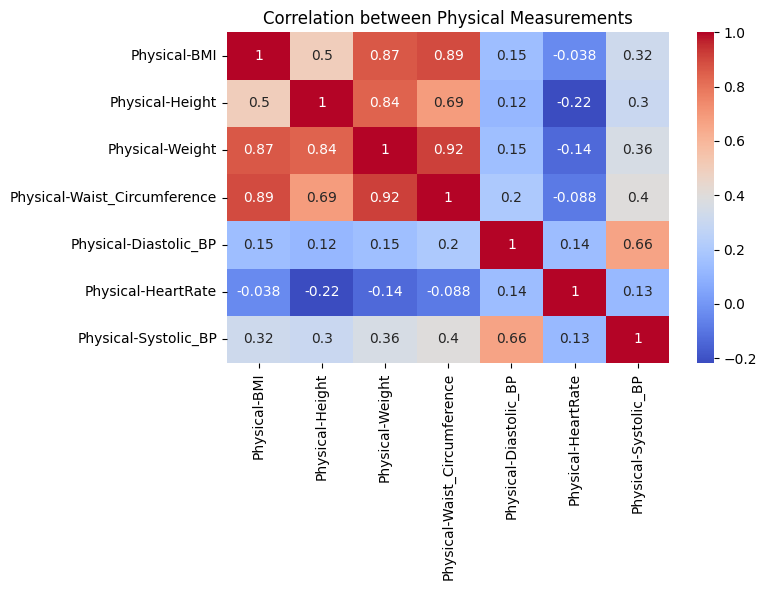

In [ ]:
# Create correlation plot between Physical measurements
physical_cols = ['Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP']
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[physical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Physical Measurements')
plt.tight_layout()
plt.show()

After looking at the above correlation graph, it makes sense to keep BMI and drop height, weight and waist circumference. Since heart rate showed no correlation with the predictor variable, it would be better to drop it. We can go ahead and keep both the BP variables for now

In [ ]:
#dropping variables based on the above analysis
train_df=train_df.drop(['Physical-Height','Physical-Weight','Physical-Waist_Circumference','Physical-HeartRate'], axis=1)

BIO-ELECTRIC IMPEDENCE

In [ ]:
bia_cols=groups.get("Bio-electric Impedance Analysis")
bia_cols

['BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW']

In [ ]:
bia_data_dict = data_dict[data_dict['Instrument'] == 'Bio-electric Impedance Analysis']
categorical_columns = bia_data_dict[bia_data_dict['Type'] == 'categorical int']['Field'].tolist()
continuous_columns = bia_data_dict[bia_data_dict['Type'] == 'float']['Field'].tolist()

Univariate analysis on continuous columns

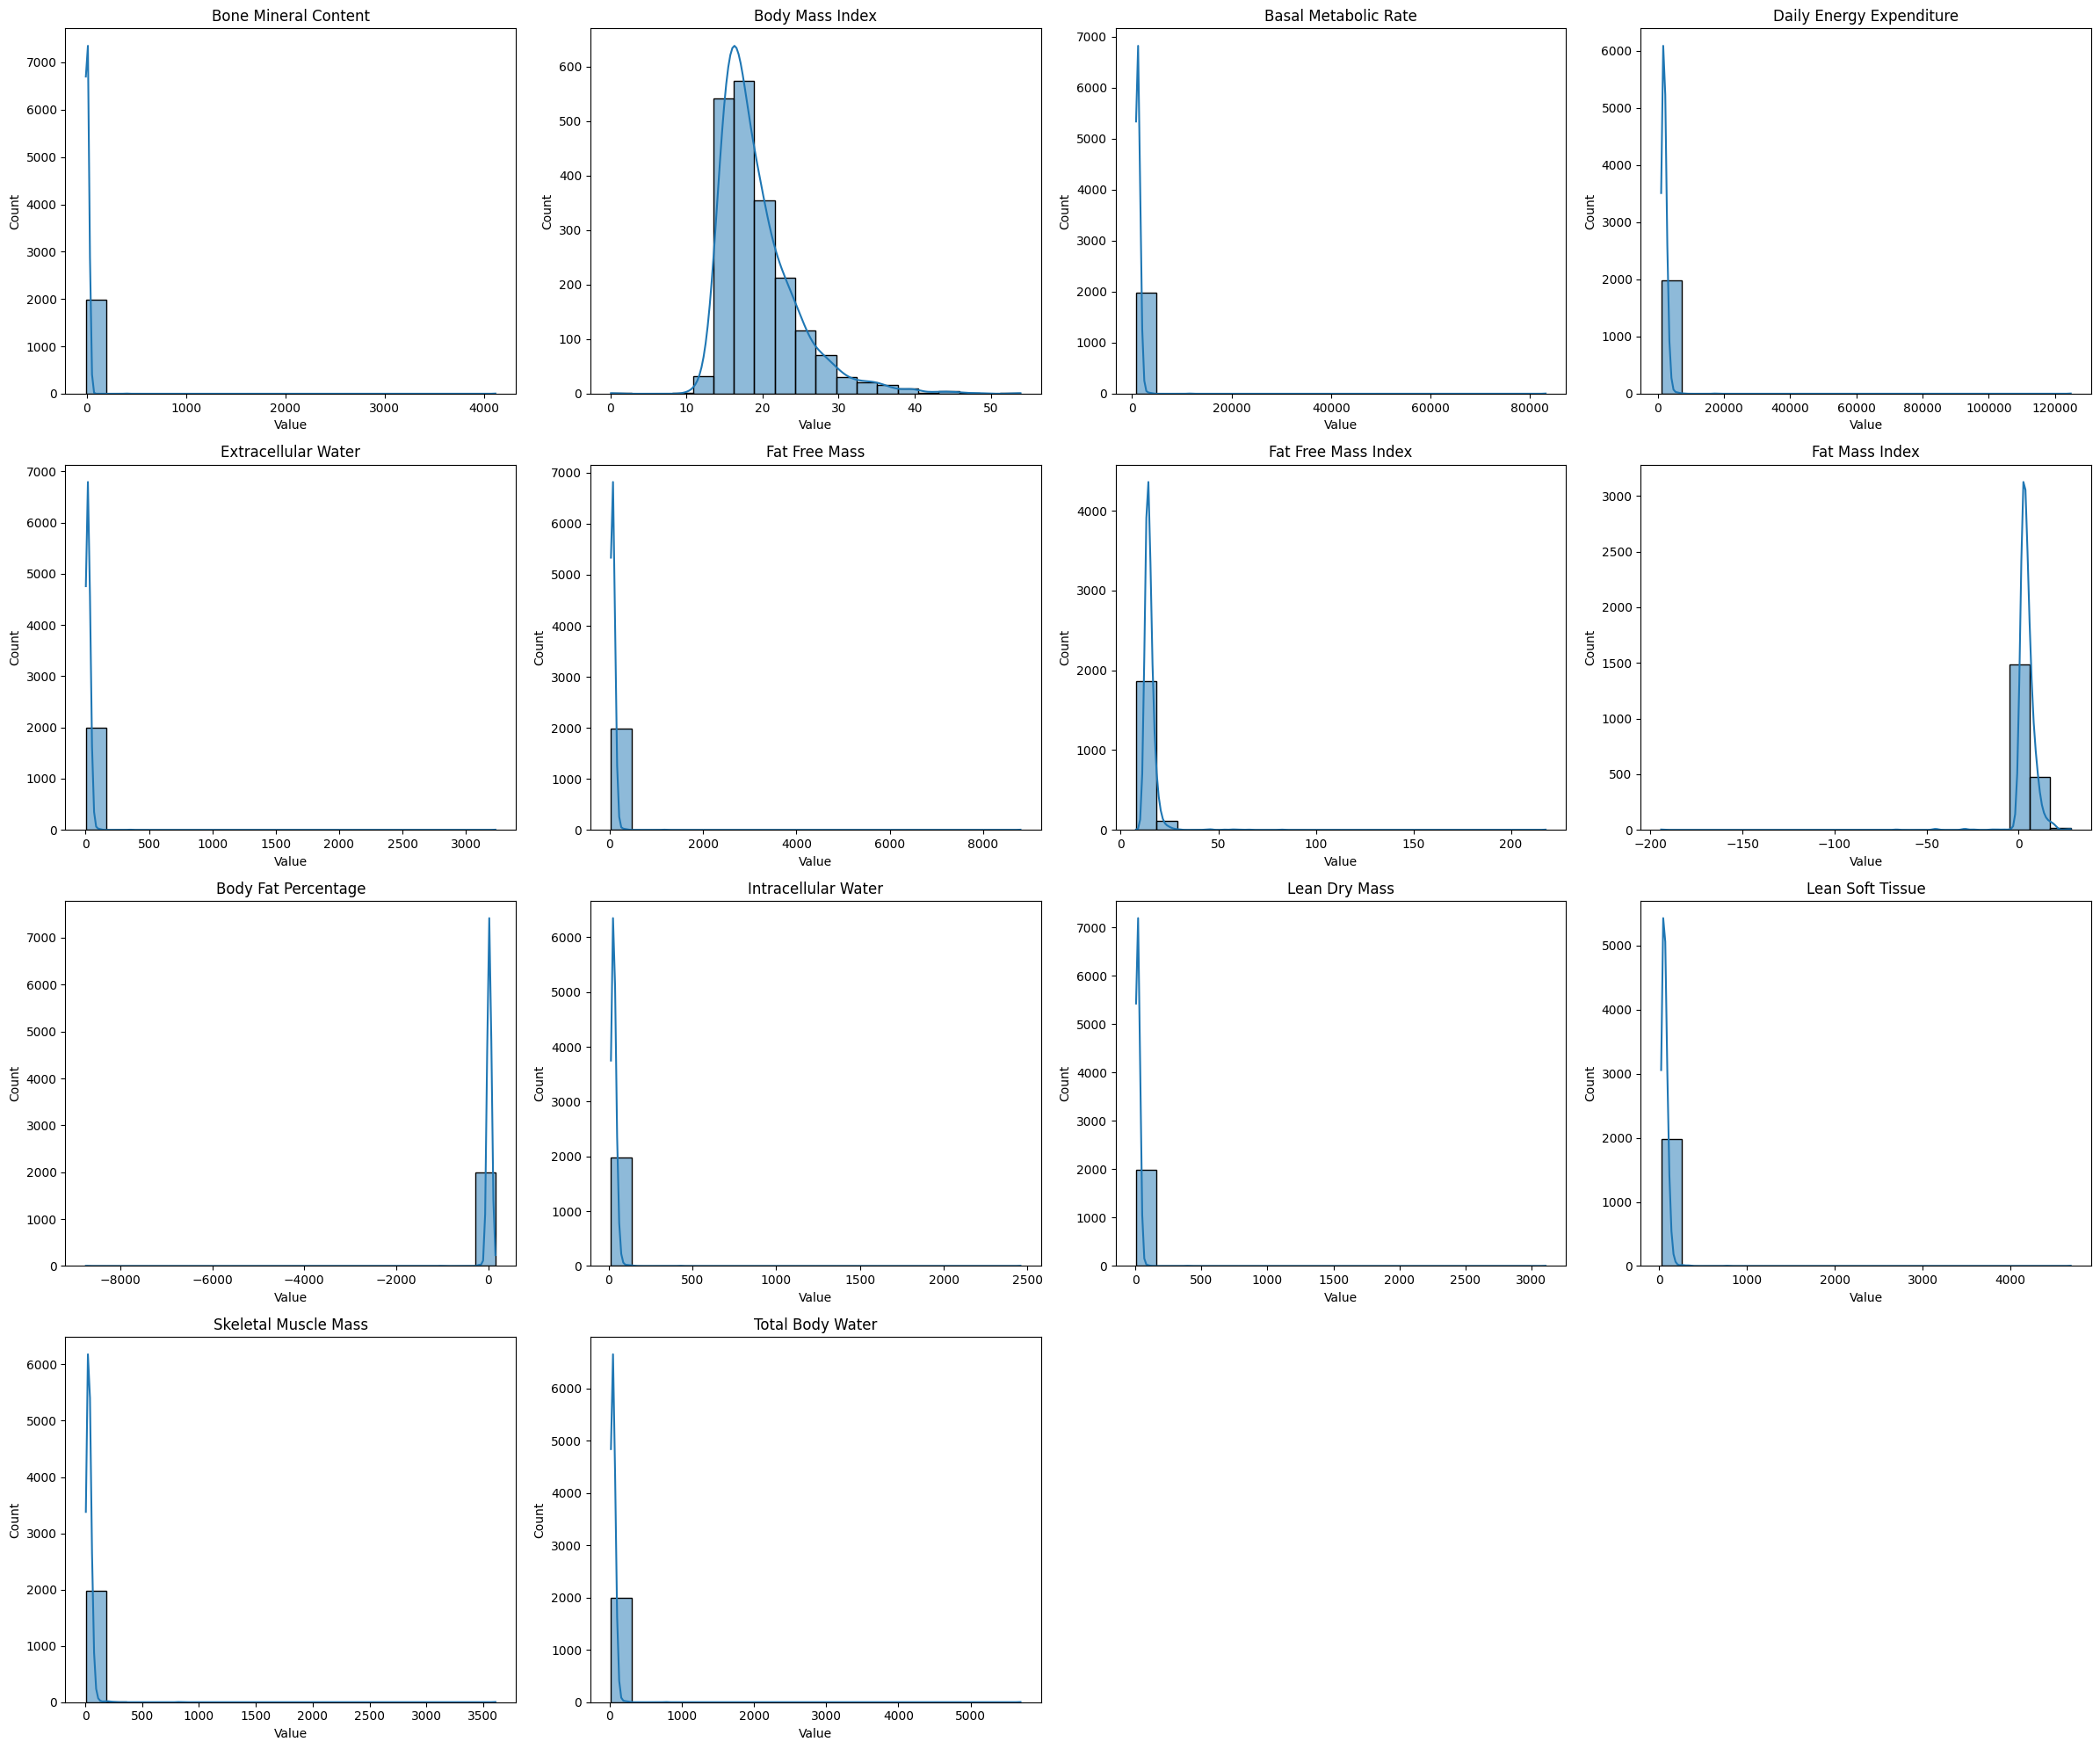

In [ ]:
plt.figure(figsize=(24, 20))

for idx, col in enumerate(continuous_columns):
    plt.subplot(4, 4, idx + 1)
    sns.histplot(train_df[col].dropna(), bins=20, kde=True)
    plt.title(data_dict[data_dict['Field'] == col]['Description'].values[0])
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
calculate_stats(train_df, continuous_columns)

count         mean          std          min          25%  \
BIA-BIA_BMC   1991.0     6.719826    92.586325    -7.789610     2.966905   
BIA-BIA_BMI   1991.0    19.367048     5.047848     0.048267    15.913600   
BIA-BIA_BMR   1991.0  1237.018187  1872.383246   813.397000  1004.710000   
BIA-BIA_DEE   1991.0  2064.693747  2836.246272  1073.450000  1605.785000   
BIA-BIA_ECW   1991.0    20.825346    73.266287     1.789450    11.109550   
BIA-BIA_FFM   1991.0    74.021708   199.433753    28.900400    49.278100   
BIA-BIA_FFMI  1991.0    15.030554     5.792505     7.864850    13.408000   
BIA-BIA_FMI   1991.0     4.336495     6.356402  -194.163000     2.306915   
BIA-BIA_Fat   1991.0    16.855020   199.372119 -8745.080000     8.602395   
BIA-BIA_ICW   1991.0    33.173380    56.272346    14.489000    24.463500   
BIA-BIA_LDM   1991.0    20.022990    70.215610     4.635810    12.983150   
BIA-BIA_LST   1991.0    67.301883   108.705918    23.620100    45.204100   
BIA-BIA_SMM   1991.0    34.389466    84.050607     4.655730    21.141550   
BIA-BIA_TBW   1991.0    53.998726   129.362539    20.589200    35.887000   

                     50%          75%          max  missing  
BIA-BIA_BMC      3.92272     5.460925    4115.3600     1969  
BIA-BIA_BMI     17.96650    21.461100      53.9243     1969  
BIA-BIA_BMR   1115.38000  1310.360000   83152.2000     1969  
BIA-BIA_DEE   1863.98000  2218.145000  124728.0000     1969  
BIA-BIA_ECW     15.92800    25.162200    3233.0000     1969  
BIA-BIA_FFM     61.06620    81.833800    8799.0800     1969  
BIA-BIA_FFMI    14.09250    15.430950     217.7710     1969  
BIA-BIA_FMI      3.69863     5.987690      28.2515     1969  
BIA-BIA_Fat     16.17460    30.273100     153.8200     1969  
BIA-BIA_ICW     28.85580    35.475700    2457.9100     1969  
BIA-BIA_LDM     16.43880    22.167600    3108.1700     1969  
BIA-BIA_LST     56.99640    77.105650    4683.7100     1969  
BIA-BIA_SMM     27.41510    38.179400    3607.6900     1969  
BIA-BIA_TBW     44.98700    60.271050    5690.9100     1969

1. According to the above analysis, most of the bia variables are highly extremely skewed, with majority of the participants having marginal values with few outliers.

2. Some of these variables (like BIA_BIA_FAT and BIA_BIA_FMI) show highly negative values indicating some data quality issues

We notice that there are two BMI variables, BIA-BIA_BMI and Physical-BMI. We need to see which one is more useful for us

In [ ]:
#Compare Physical-BMI and BIA-BIA-BMI based on nulls
train_df['BIA-BIA_BMI'].isna().sum()

1969

In [ ]:
train_df['Physical-BMI'].isna().sum()

945

BIA-BIA_BMI has more null values compared to Physical-BMI. It would make more sense to keep Physical-BMI solely on the basis of this fact.

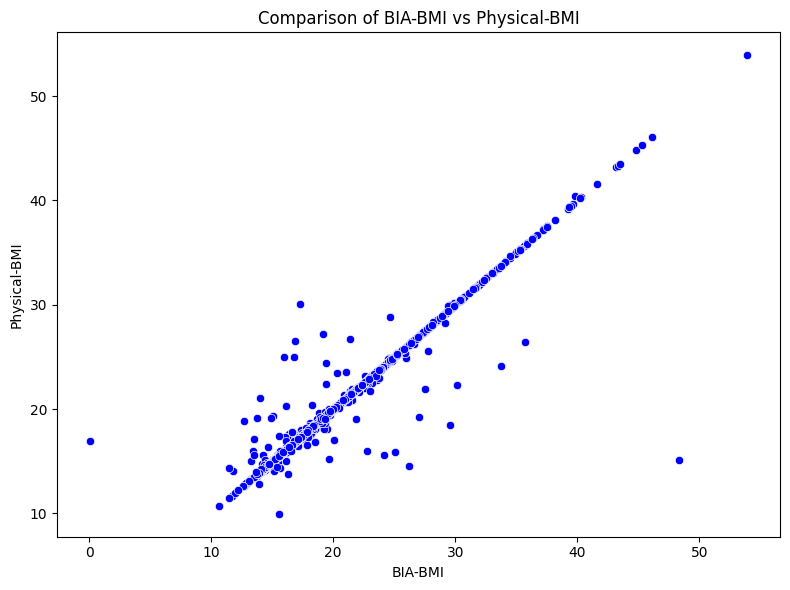

In [ ]:
bmi_data = train_df[['BIA-BIA_BMI', 'Physical-BMI']].dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BIA-BIA_BMI', y='Physical-BMI',
    data=bmi_data,
    color='b'
)
plt.title('Comparison of BIA-BMI vs Physical-BMI')
plt.xlabel('BIA-BMI')
plt.ylabel('Physical-BMI')

plt.tight_layout()
plt.show()

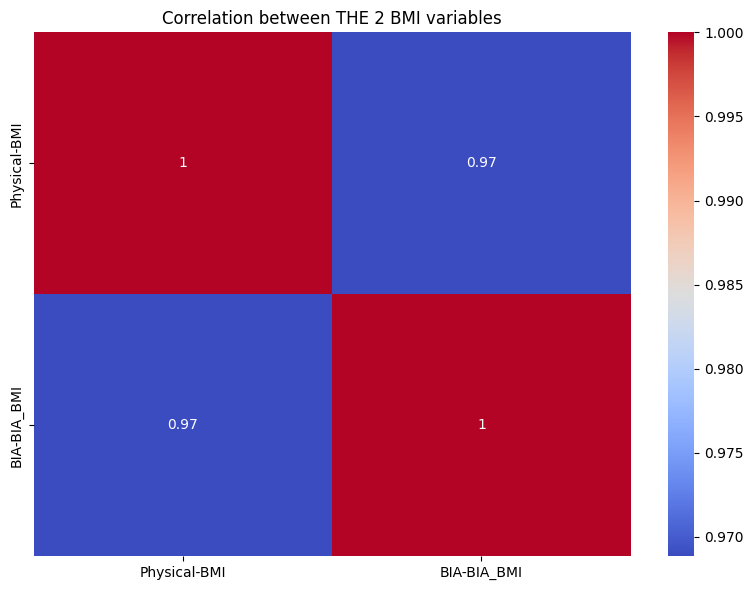

In [ ]:
# Create correlation plot between Physical measurements
bmi_cols = ['Physical-BMI','BIA-BIA_BMI']
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[bmi_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between THE 2 BMI variables')
plt.tight_layout()
plt.show()

Since the values are almost similar and these variables are highly correlated, we can go ahead and drop BIA-BIA_BMI as this seems to be a more meaningless variable for us

In [ ]:
train_df.shape

(3960, 80)

In [ ]:
#Dropping a variable
train_df=train_df.drop(['BIA-BIA_BMI'], axis=1)

Checking for Correlation between the BIA columns

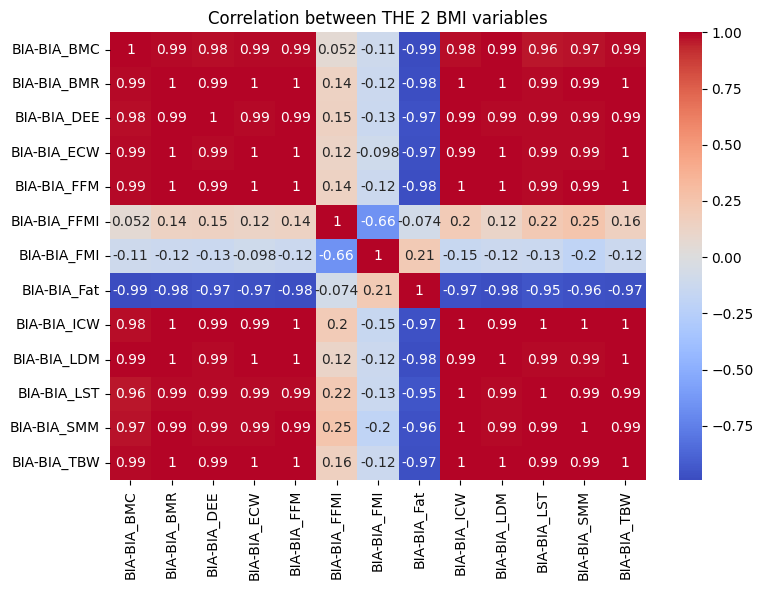

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[['BIA-BIA_BMC',
 #'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between THE 2 BMI variables')
plt.tight_layout()
plt.show()

Most of these variables are highly correlated with one another. We can either drop all these variables and further explore how to feature engineer some of these columns

In [ ]:
train_df[['BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 #'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW']].describe()

BIA-BIA_Activity_Level_num  BIA-BIA_BMC   BIA-BIA_BMR    BIA-BIA_DEE  \
count                 1991.000000  1991.000000   1991.000000    1991.000000   
mean                     2.651431     6.719826   1237.018187    2064.693747   
std                      1.028267    92.586325   1872.383246    2836.246272   
min                      1.000000    -7.789610    813.397000    1073.450000   
25%                      2.000000     2.966905   1004.710000    1605.785000   
50%                      3.000000     3.922720   1115.380000    1863.980000   
75%                      3.000000     5.460925   1310.360000    2218.145000   
max                      5.000000  4115.360000  83152.200000  124728.000000   

       BIA-BIA_ECW  BIA-BIA_FFM  BIA-BIA_FFMI  BIA-BIA_FMI  BIA-BIA_Fat  \
count  1991.000000  1991.000000   1991.000000  1991.000000  1991.000000   
mean     20.825346    74.021708     15.030554     4.336495    16.855020   
std      73.266287   199.433753      5.792505     6.356402   199.372119   
min       1.789450    28.900400      7.864850  -194.163000 -8745.080000   
25%      11.109550    49.278100     13.408000     2.306915     8.602395   
50%      15.928000    61.066200     14.092500     3.698630    16.174600   
75%      25.162200    81.833800     15.430950     5.987690    30.273100   
max    3233.000000  8799.080000    217.771000    28.251500   153.820000   

       BIA-BIA_Frame_num  BIA-BIA_ICW  BIA-BIA_LDM  BIA-BIA_LST  BIA-BIA_SMM  \
count        1991.000000  1991.000000   1991.00000  1991.000000  1991.000000   
mean            1.745354    33.173380     20.02299    67.301883    34.389466   
std             0.680635    56.272346     70.21561   108.705918    84.050607   
min             1.000000    14.489000      4.63581    23.620100     4.655730   
25%             1.000000    24.463500     12.98315    45.204100    21.141550   
50%             2.000000    28.855800     16.43880    56.996400    27.415100   
75%             2.000000    35.475700     22.16760    77.105650    38.179400   
max             3.000000  2457.910000   3108.17000  4683.710000  3607.690000   

       BIA-BIA_TBW  
count  1991.000000  
mean     53.998726  
std     129.362539  
min      20.589200  
25%      35.887000  
50%      44.987000  
75%      60.271050  
max    5690.910000

Dealing with negative values and implausible values of the BIA features

In [ ]:
#Any value below 5 for fat percentage seems to be incorrect
train_df["BIA-BIA_Fat"] = np.where(train_df["BIA-BIA_Fat"] < 5, np.nan, train_df["BIA-BIA_Fat"])

In [ ]:
#Any value above 10,000 for energy expenditure seems to be incorrect
train_df["BIA-BIA_DEE"] = np.where(train_df["BIA-BIA_DEE"] > 10000, np.nan, train_df["BIA-BIA_DEE"])

Text(0, 0.5, 'BIA_BIA_Fat')

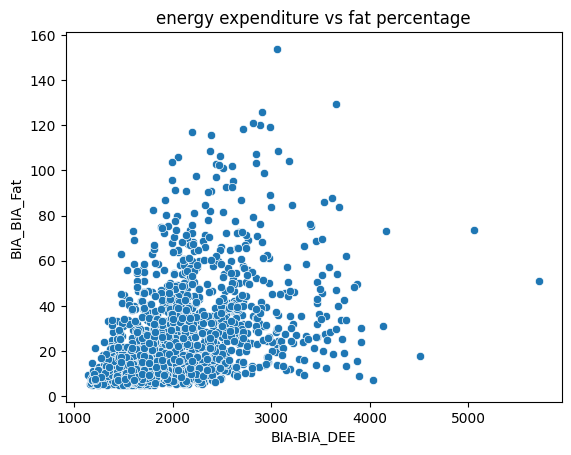

In [ ]:
sns.scatterplot(x='BIA-BIA_DEE', y='BIA-BIA_Fat', data=train_df)
plt.title('energy expenditure vs fat percentage')
plt.xlabel('BIA-BIA_DEE')
plt.ylabel('BIA_BIA_Fat')

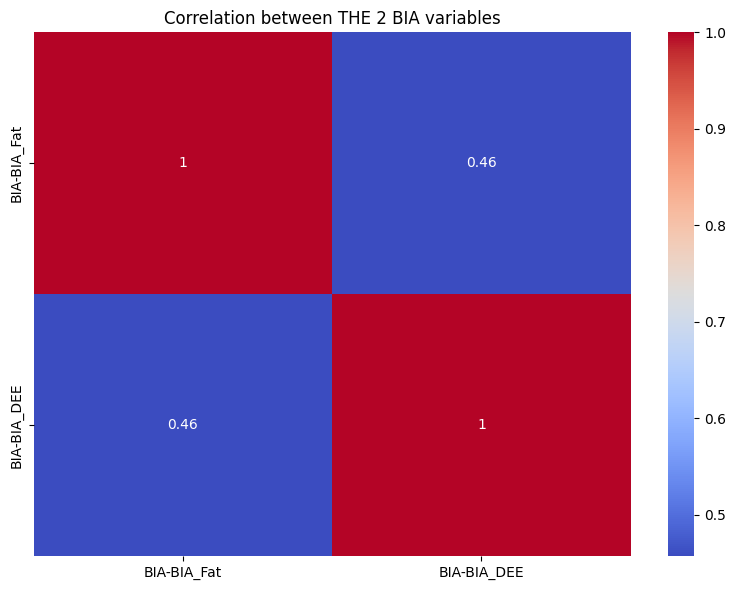

In [ ]:
# Create correlation plot between Physical measurements
bmi_cols = ['BIA-BIA_Fat','BIA-BIA_DEE']
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[bmi_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between THE 2 BIA variables')
plt.tight_layout()
plt.show()

There is a slight positive correlation, which makes sense because individuals with higher body fat percentages would require more energy for basic bodily functions

SII vs body fat

Text(0.5, 1.0, 'Internet Addiction Scores Across Body Fat Categories')

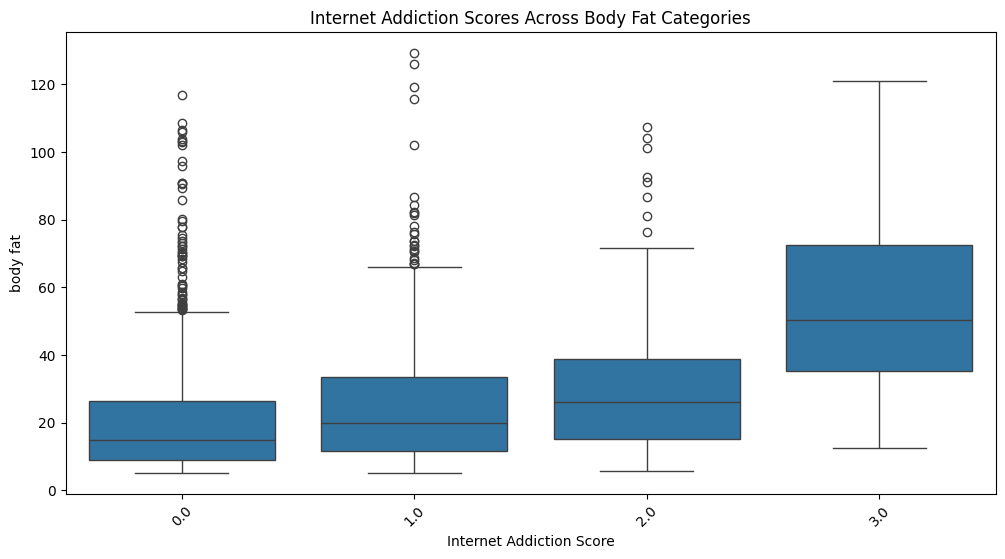

In [ ]:
# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='sii', y='BIA-BIA_Fat', data=train_df)
plt.xticks(rotation=45)
plt.xlabel('Internet Addiction Score')
plt.ylabel('body fat')
plt.title('Internet Addiction Scores Across Body Fat Categories')

1. From this graph, higher SII scores tend to relate to participats with higher body fat percentages

Activity level vs PCIAT score

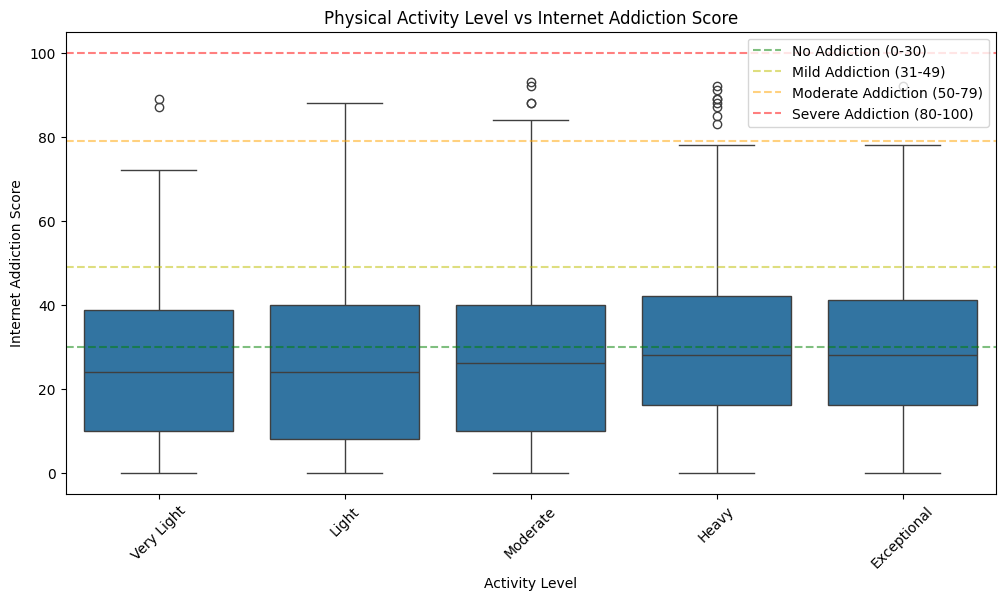

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='BIA-BIA_Activity_Level_num', y='PCIAT-PCIAT_Total', data=train_df)
plt.xlabel('Activity Level')
plt.ylabel('Internet Addiction Score')
plt.title('Physical Activity Level vs Internet Addiction Score')

# Add activity level labels
activity_labels = ['Very Light', 'Light', 'Moderate', 'Heavy', 'Exceptional']
plt.xticks(range(5), activity_labels, rotation=45)

# Add reference lines for addiction severity levels
plt.axhline(y=30, color='g', linestyle='--', alpha=0.5, label='No Addiction (0-30)')
plt.axhline(y=49, color='y', linestyle='--', alpha=0.5, label='Mild Addiction (31-49)')
plt.axhline(y=79, color='orange', linestyle='--', alpha=0.5, label='Moderate Addiction (50-79)')
plt.axhline(y=100, color='r', linestyle='--', alpha=0.5, label='Severe Addiction (80-100)')

plt.legend()


1. This visualization suggests that physical activity level alone may not be strongly predictive of internet addiction tendencies, as similar addiction score patterns appear across all activity levels.

Skeletal mass has unusually high values, we have to fix these

In [ ]:
train_df["BIA-BIA_SMM"] = np.where(train_df["BIA-BIA_SMM"] > 300, np.nan, train_df["BIA-BIA_SMM"])

Text(0.5, 1.0, 'Body Fat vs Skeletal Muscle Mass Distribution')

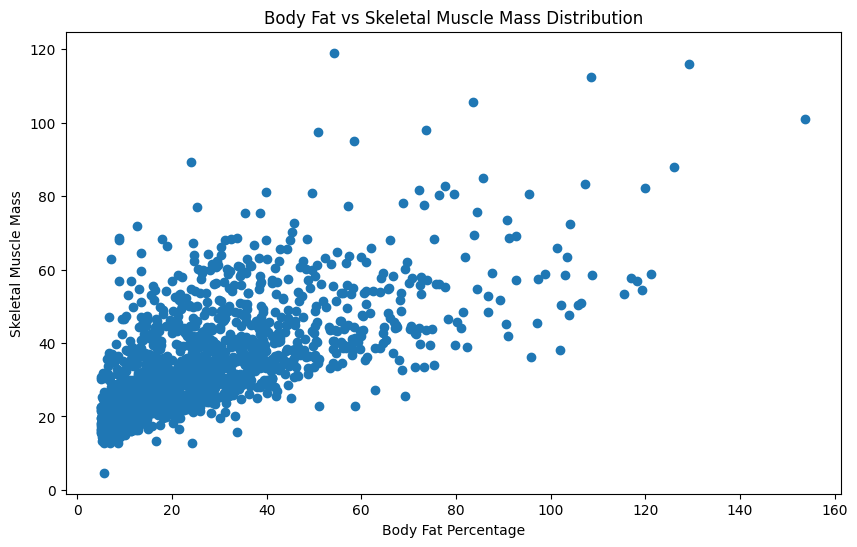

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df['BIA-BIA_Fat'], train_df['BIA-BIA_SMM'])
plt.xlabel('Body Fat Percentage')
plt.ylabel('Skeletal Muscle Mass')
plt.title('Body Fat vs Skeletal Muscle Mass Distribution')


In [ ]:
#taking care of very high BMR values
# Basal Metabolic Rate
train_df["BIA-BIA_BMR"] = np.where(train_df["BIA-BIA_BMR"] > 4000, np.nan, train_df["BIA-BIA_BMR"])

Distribution of BMR across different age groups

Text(0.5, 1.0, 'BMR Distribution Across Age Groups')

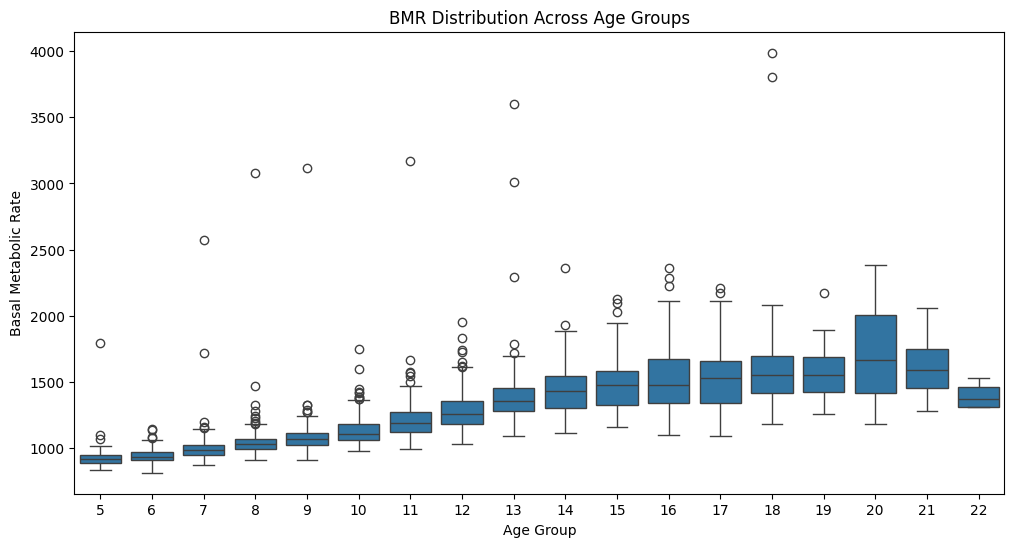

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Basic_Demos-Age', y='BIA-BIA_BMR', data=train_df)
plt.xlabel('Age Group')
plt.ylabel('Basal Metabolic Rate')
plt.title('BMR Distribution Across Age Groups')


1. As age increases, the basal metabolic rate tends to increase
2. There is more variability among older adolescents, which could suggest differences in metabolism during these years
3. There are many outlier points for each age group

Distribution of energy across different activity levels

Text(0.5, 1.0, 'Energy Expenditure Distribution by Activity Level')

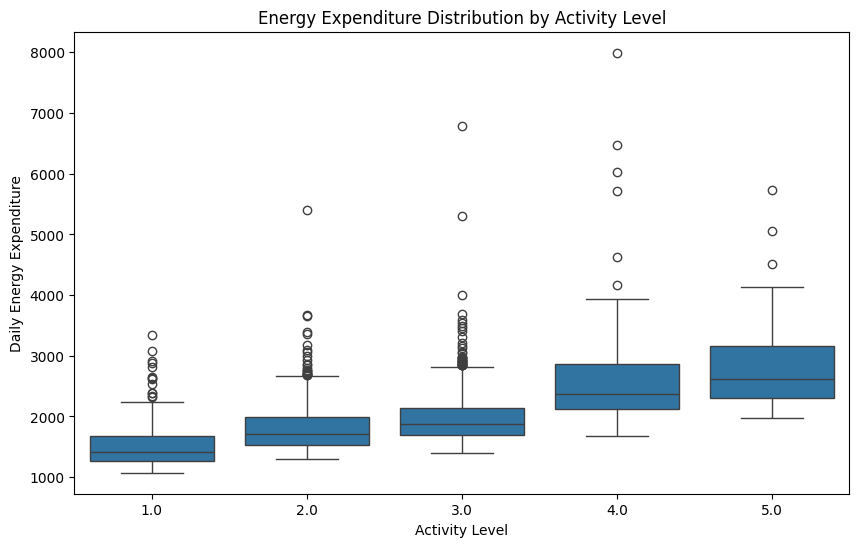

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BIA-BIA_Activity_Level_num', y='BIA-BIA_DEE', data=train_df)
plt.xlabel('Activity Level')
plt.ylabel('Daily Energy Expenditure')
plt.title('Energy Expenditure Distribution by Activity Level')

Distribution of fat for males and females

Text(0.5, 1.0, 'Body Fat Distribution by Sex')

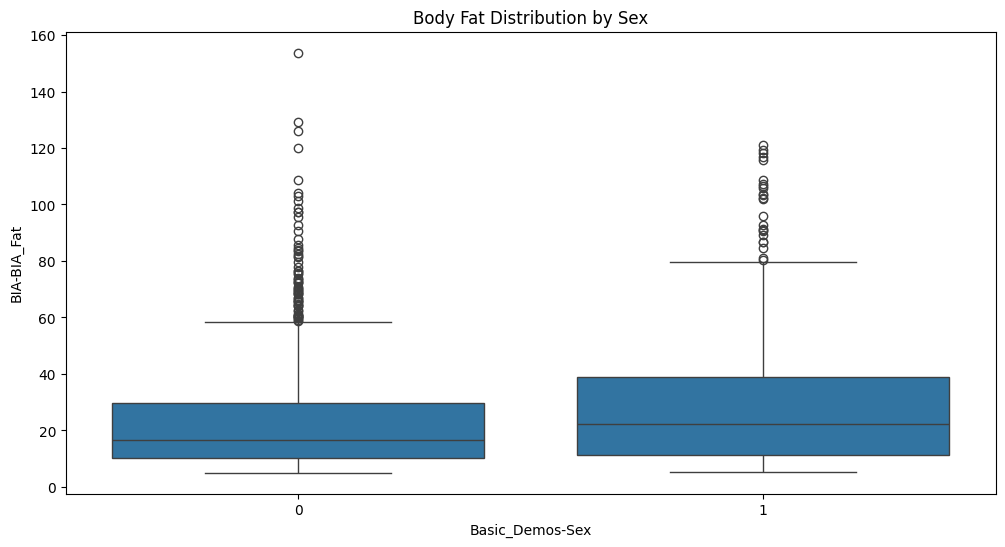

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Basic_Demos-Sex', y='BIA-BIA_Fat')
plt.title('Body Fat Distribution by Sex')


1. In our dataset, females tend to have a slightly higher body fat percentage as compared to men. This is a true fact

Distribution of BMR across different age groups

<Axes: xlabel='age_group', ylabel='BIA-BIA_BMR'>

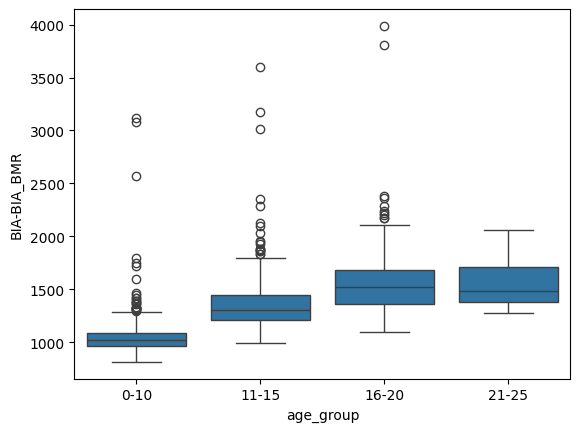

In [ ]:
# Create age groups
copy_df=train_df.copy()
copy_df['age_group'] = pd.cut(copy_df['Basic_Demos-Age'],
                        bins=[0, 10, 15, 20, 25],
                        labels=['0-10', '11-15', '16-20', '21-25'])
sns.boxplot(data=copy_df, x='age_group', y='BIA-BIA_BMR')



Distribution of activity levels across different age groups

<ipython-input-79-9075ce3ba1b0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  copy_df.groupby(['age_group', 'BIA-BIA_Activity_Level_num']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='age_group'>

<Figure size 1000x600 with 0 Axes>

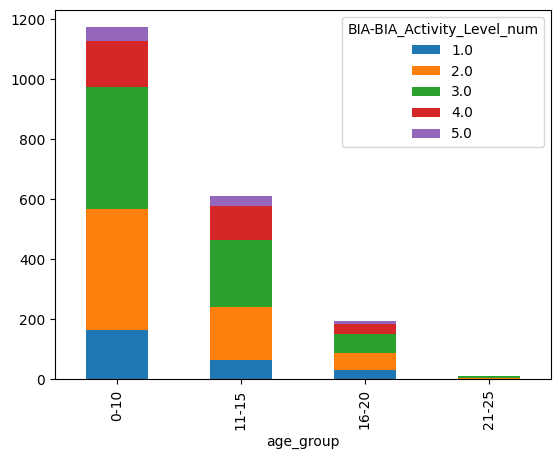

In [ ]:
plt.figure(figsize=(10, 6))
copy_df.groupby(['age_group', 'BIA-BIA_Activity_Level_num']).size().unstack().plot(kind='bar', stacked=True)

1. participants with age 0-10 usually have light to moderate activity levels
2. participants with age 11-15 also usually have light to moderate activity levels
3. participants between ages 16-20 usually majorly have either light, moderate or heavy activity levels
4. Above the age of 21, activity levels are very less

Distribution of body fat percentages across different activity levels

Text(0.5, 1.0, 'Body Fat Distribution by Activity Level')

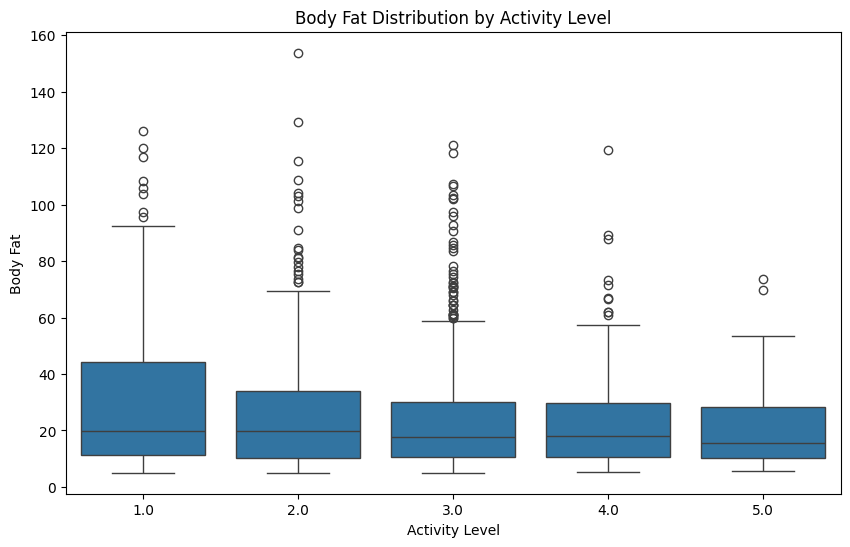

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BIA-BIA_Activity_Level_num', y='BIA-BIA_Fat', data=train_df)
plt.xlabel('Activity Level')
plt.ylabel('Body Fat')
plt.title('Body Fat Distribution by Activity Level')

1. Higher activity levels (4-5) generally correspond to lower median body fat percentages
2. Very light activity (Level 1) shows higher median body fat percentage

Looking at Correlation between all BIA columns

In [ ]:
bia_cols

['BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW']

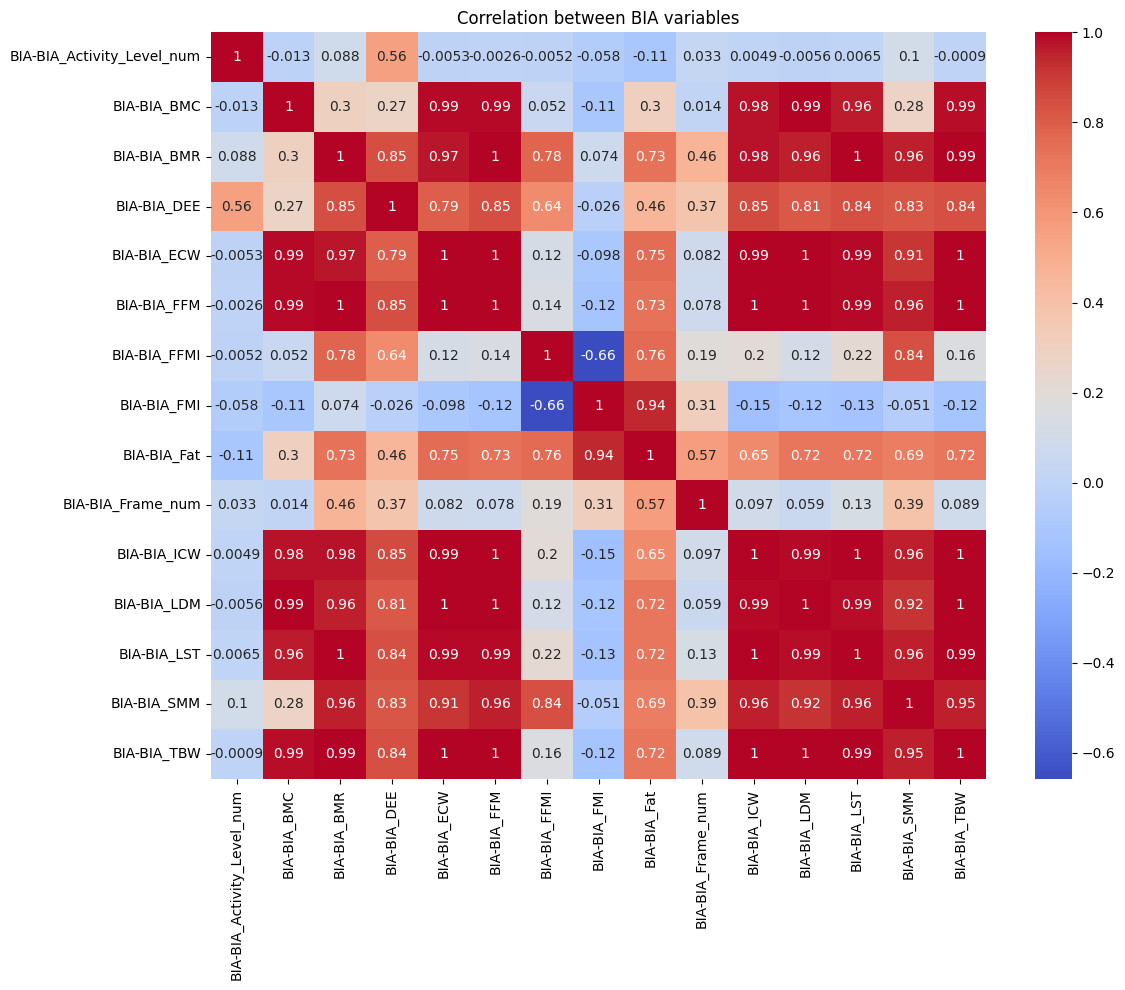

In [ ]:
# Create correlation plot between Physical measurements
bmi_cols = [
    #'BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 #'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW']
plt.figure(figsize=(12, 10))
sns.heatmap(train_df[bmi_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between BIA variables')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select BIA variables for VIF calculation
bia_columns = [
    #'BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 #'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 #'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 #'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 #'BIA-BIA_LST',
 'BIA-BIA_SMM',
 #'BIA-BIA_TBW'
 ]
# Remove rows with missing values
bia_data = train_df[bia_columns].dropna()

# Create DataFrame to store VIF values
vif_df = pd.DataFrame()
vif_df["Variable"] = bia_columns
vif_df["VIF"] = [variance_inflation_factor(bia_data.values, i)
                 for i in range(bia_data.shape[1])]

# Sort by VIF value in descending order
vif_df = vif_df.sort_values('VIF', ascending=False)

print("Variance Inflation Factors:")
print(vif_df)


Variance Inflation Factors:
                      Variable         VIF
2                  BIA-BIA_BMR  999.611724
4                  BIA-BIA_FFM  524.156694
5                 BIA-BIA_FFMI  402.438135
3                  BIA-BIA_DEE  293.502867
9                  BIA-BIA_LDM  126.097819
7                  BIA-BIA_Fat   92.533706
6                  BIA-BIA_FMI   87.656886
10                 BIA-BIA_SMM   75.622985
0   BIA-BIA_Activity_Level_num   52.394123
8            BIA-BIA_Frame_num   12.787340
1                  BIA-BIA_BMC    5.437654


Based on the above analysis, we drop the following variables - 'BIA-BIA_TBW', 'BIA-BIA_LST', 'BIA-BIA_ICW','BIA-BIA_ECW'

In [ ]:
train_df.drop(['BIA-BIA_TBW', 'BIA-BIA_LST'], axis=1, inplace=True)

In [ ]:
train_df.drop(['BIA-BIA_ICW','BIA-BIA_ECW'], axis=1, inplace=True)

We keep the above variables above so that we can perform data engineering on these features later downstream

In [ ]:
train_df['BIA-BIA_BMC'].describe()

count    1991.000000
mean        6.719826
std        92.586325
min        -7.789610
25%         2.966905
50%         3.922720
75%         5.460925
max      4115.360000
Name: BIA-BIA_BMC, dtype: float64

Removing extreme values from the remaining BIA variables

In [ ]:
# Bone Mineral Content
train_df["BIA-BIA_BMC"] = np.where(train_df["BIA-BIA_BMC"] <= 0, np.nan, train_df["BIA-BIA_BMC"])
train_df["BIA-BIA_BMC"] = np.where(train_df["BIA-BIA_BMC"] > 10, np.nan, train_df["BIA-BIA_BMC"])

In [ ]:
train_df["BIA-BIA_FFM"] = np.where(train_df["BIA-BIA_FFM"] <= 0, np.nan, train_df["BIA-BIA_FFM"])
train_df["BIA-BIA_FFM"] = np.where(train_df["BIA-BIA_FFM"] > 300, np.nan, train_df["BIA-BIA_FFM"])

In [ ]:
train_df["BIA-BIA_FMI"] = np.where(train_df["BIA-BIA_FMI"] < 0, np.nan, train_df["BIA-BIA_FMI"])

In [ ]:
train_df["BIA-BIA_LDM"] = np.where(train_df["BIA-BIA_LDM"] > 100, np.nan, train_df["BIA-BIA_LDM"])

In [ ]:
train_df["BIA-BIA_SMM"] = np.where(train_df["BIA-BIA_SMM"] > 300, np.nan, train_df["BIA-BIA_SMM"])

FitnessGram Vitals and Treadmill

In [ ]:
fg_vitals=groups.get('FitnessGram Vitals and Treadmill', [])
fg_vitals

['Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec']

In [ ]:
calculate_stats(train_df, ['Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec'])

count       mean        std  min    25%   50%  \
Fitness_Endurance-Max_Stage  743.0   4.989233   2.014072  0.0   4.00   5.0   
Fitness_Endurance-Time_Mins  740.0   7.370270   3.189662  0.0   6.00   7.0   
Fitness_Endurance-Time_Sec   740.0  27.581081  17.707751  0.0  12.75  28.0   

                              75%   max  missing  
Fitness_Endurance-Max_Stage   6.0  28.0     3217  
Fitness_Endurance-Time_Mins   9.0  20.0     3220  
Fitness_Endurance-Time_Sec   43.0  59.0     3220

In [ ]:
print(3217/train_df.shape[0])
print(3220/train_df.shape[0])

0.8123737373737374
0.8131313131313131


Checking the age range of participants with Fitness_Endurance-Max_Stage data

In [ ]:
data = train_df[train_df['Fitness_Endurance-Max_Stage'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with Fitness_Endurance-Max_Stage data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with Fitness_Endurance-Max_Stage data: 6 - 12 years


<ipython-input-96-f49c4fec2a8a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


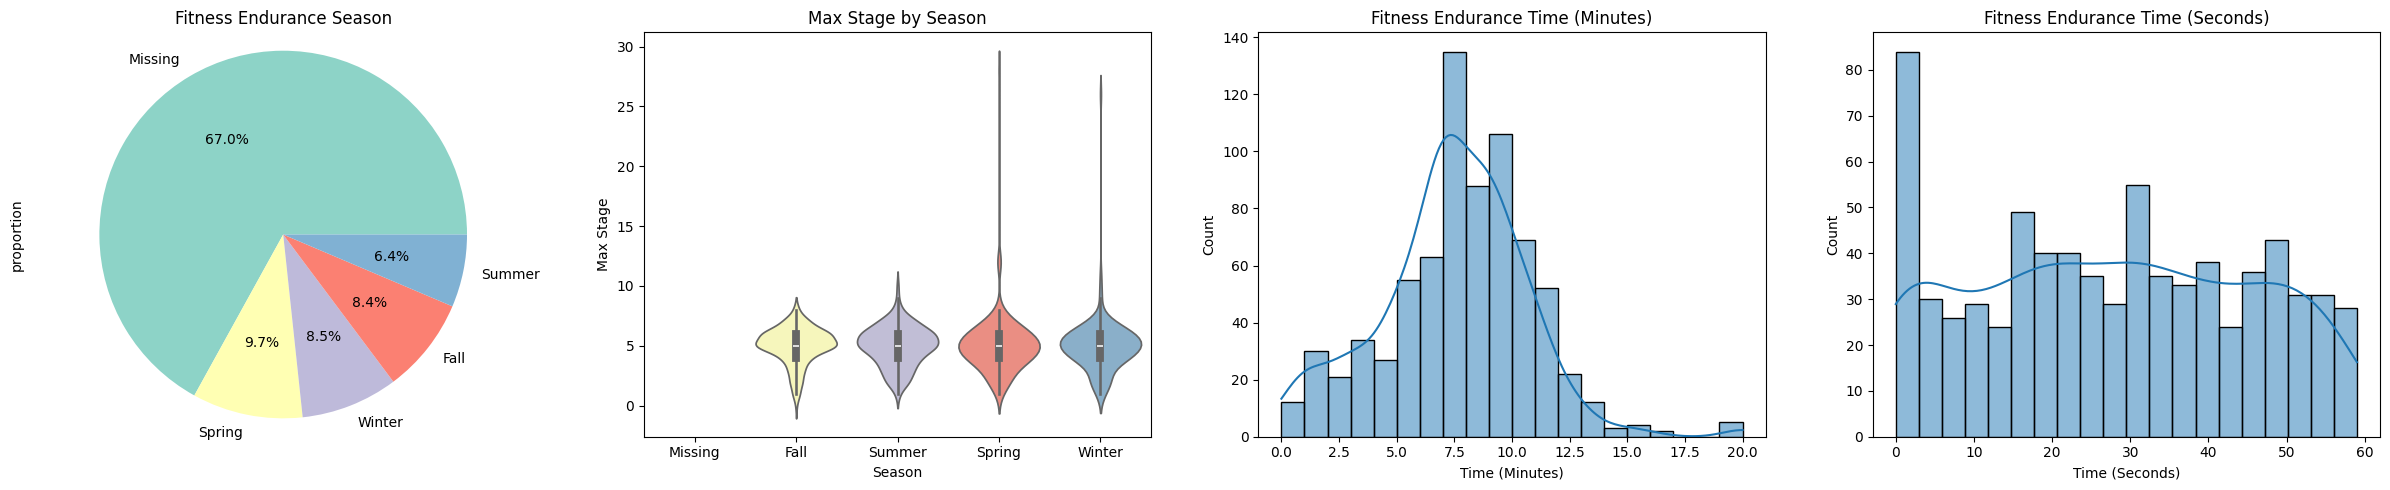

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Fitness Endurance Season
train_df['Fitness_Endurance-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors, ax=axes[0]
)
axes[0].set_title('Fitness Endurance Season')
axes[0].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Box plot for Max Stage by Season
sns.violinplot(
    x='Fitness_Endurance-Season',
    y='Fitness_Endurance-Max_Stage',
    data=train_df, palette="Set3",
    ax=axes[1]
)
axes[1].set_title('Max Stage by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Max Stage')

# Fitness Endurance Time (Minutes)
sns.histplot(train_df['Fitness_Endurance-Time_Mins'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Fitness Endurance Time (Minutes)')
axes[2].set_xlabel('Time (Minutes)')

# Fitness Endurance Time (Seconds)
sns.histplot(train_df['Fitness_Endurance-Time_Sec'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Fitness Endurance Time (Seconds)')
axes[3].set_xlabel('Time (Seconds)')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

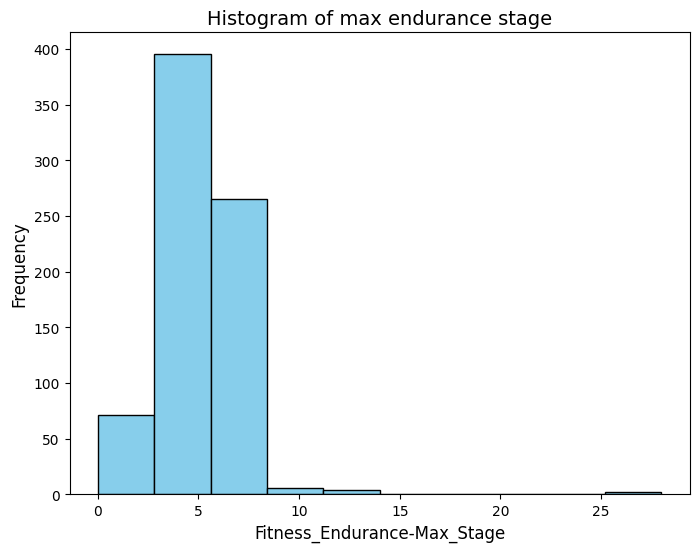

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(train_df['Fitness_Endurance-Max_Stage'], color='skyblue', edgecolor='black')
plt.title('Histogram of max endurance stage', fontsize=14)
plt.xlabel('Fitness_Endurance-Max_Stage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

<ipython-input-98-a9b160748e95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Basic_Demos-Age', y='Fitness_Endurance-Max_Stage', data=train_df, palette="Set3")


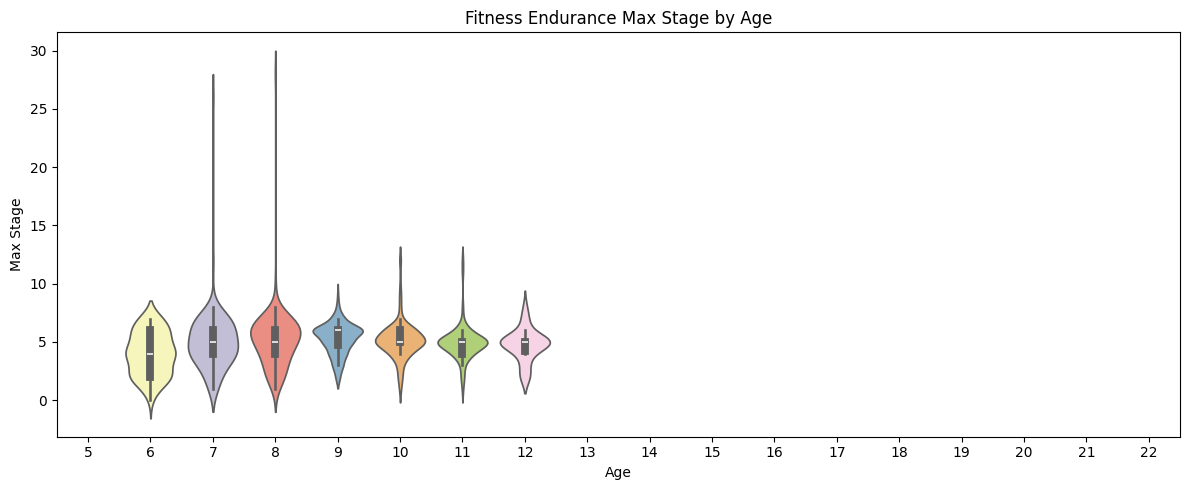

In [ ]:
plt.figure(figsize=(12, 5))

sns.violinplot(x='Basic_Demos-Age', y='Fitness_Endurance-Max_Stage', data=train_df, palette="Set3")
plt.title('Fitness Endurance Max Stage by Age')
plt.xlabel('Age')
plt.ylabel('Max Stage')

plt.tight_layout()
plt.show()

1. From the above analysis we can see that 'Fitness_Endurance-Max_Stage' has values from 1-12 and post that it only has values 26 and 28. These values could be anomalies in the dataset as only 1 observation falls under each of these categories and there is a large gap between 12 and 26

2. The above group of variables have around 81% missing values in rows. These variables do not look promising to use for modelling purposes

3. Most participants reached stage 5 in the endurance test.

4. Some participants failed to complete the first stage (min = 0), or these are errors in data.

5. There is a small number of participants with exceptionally high endurance of age 7-8 years.

Checking combination of missing values

In [ ]:
train_df[
    (train_df['Fitness_Endurance-Max_Stage'].notna()) &
    (train_df['Fitness_Endurance-Time_Mins'].isna() |
     train_df['Fitness_Endurance-Time_Sec'].isna())
][fg_vitals]

Fitness_Endurance-Season  Fitness_Endurance-Max_Stage  \
420                    Winter                          4.0   
1470                   Winter                         26.0   
2907                   Winter                          1.0   
3666                     Fall                          2.0   

      Fitness_Endurance-Time_Mins  Fitness_Endurance-Time_Sec  
420                           6.0                         NaN  
1470                          NaN                         NaN  
2907                          NaN                        26.0  
3666                          NaN                         NaN

It's possible that during data entry minutes or seconds were left blank (entered as NaN) when they should have been recorded as 0 minutes/seconds. While the missing seconds are not as important, the missing minutes may actually be missing and treating them as 0 would give an incorrect test result. I think it's better to just remove these suspicious cases.

In [ ]:
fg_vitals

['Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec']

In [ ]:
train_df.loc[
    (train_df['Fitness_Endurance-Max_Stage'].notna()) &
    (train_df['Fitness_Endurance-Time_Mins'].isna() |
     train_df['Fitness_Endurance-Time_Sec'].isna()), [ 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec']
] = np.nan

Get one time column (mins + sec)

In [ ]:
train_df['Fitness_Endurance-Total_Time_Sec'] = train_df[
    'Fitness_Endurance-Time_Mins'
] * 60 + train_df['Fitness_Endurance-Time_Sec']

Dropping the mins and secs column

In [ ]:
train_df.drop(['Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec'], inplace=True, axis=1)

Sleep disturbance Scale

In [ ]:
sds=groups.get('Sleep Disturbance Scale', [])
sds

['SDS-Season', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

In [ ]:
calculate_stats(train_df, ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T'])

count       mean        std   min   25%   50%   75%  \
SDS-SDS_Total_Raw  2609.0  41.088923  10.427433  17.0  33.0  39.0  46.0   
SDS-SDS_Total_T    2606.0  57.763622  13.196091  38.0  47.0  55.0  64.0   

                     max  missing  
SDS-SDS_Total_Raw   96.0     1351  
SDS-SDS_Total_T    100.0     1354

Text(0, 0.5, 'Sleep Disturbance Score')

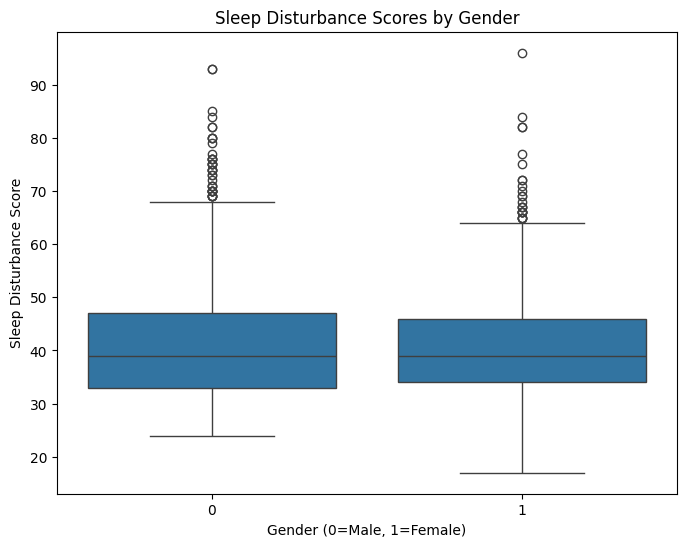

In [ ]:
## Gender and Sleep Disturbance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Basic_Demos-Sex', y='SDS-SDS_Total_Raw', data=train_df)
plt.title('Sleep Disturbance Scores by Gender')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Sleep Disturbance Score')

There is not much difference in the distribution of sleep disturbance among males and females. This plot suggests that gender alone might not be a major differentiating factor in sleep disturbance scores.

Text(0, 0.5, 'Sleep Disturbance Score')

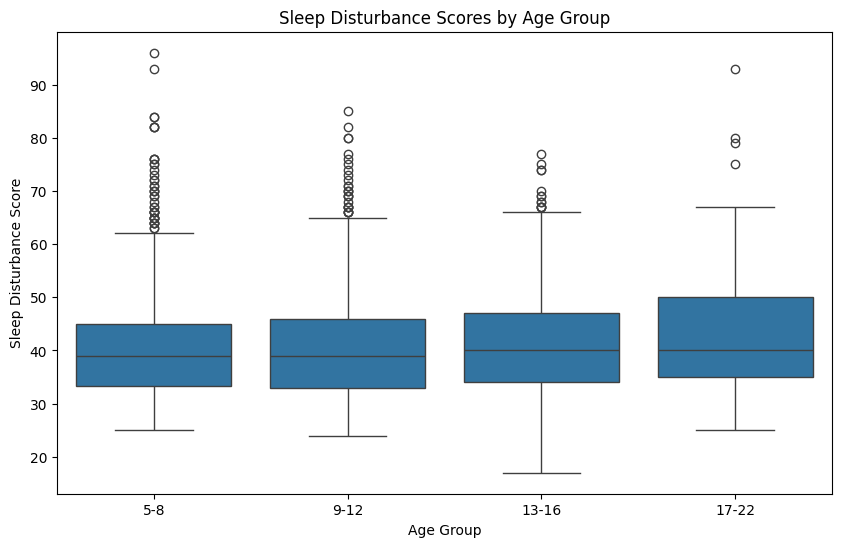

In [ ]:
# Create meaningful age groups
train_df['age_group'] = pd.cut(train_df['Basic_Demos-Age'],
                        bins=[4, 8, 12, 16, 22],
                        labels=['5-8', '9-12', '13-16', '17-22'])


#Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='SDS-SDS_Total_Raw', data=train_df)
plt.title('Sleep Disturbance Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sleep Disturbance Score')


1. On average, the average sleep disturbance scale of every group is almost the same
2. The variability of sleep disturbance in each group is almost the same for all ages
3. For participants of ages 17-22, there is a slightly higher median and more variability, suggesting a marginally higher tendency for sleep disturbances in this age range.

Text(0, 0.5, 'Sleep Disturbance Score')

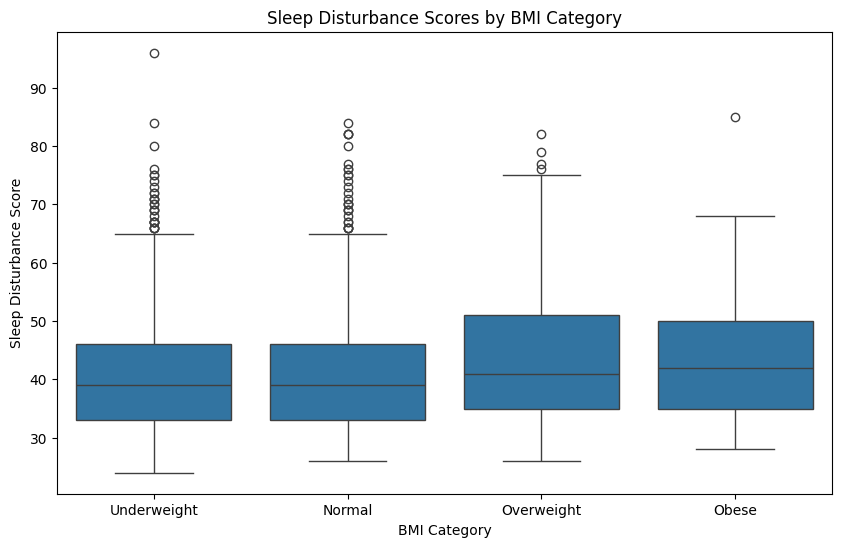

In [ ]:
# Create BMI categories
train_df['bmi_category'] = pd.cut(train_df['Physical-BMI'],
                           bins=[0, 18.5, 25, 30, 100],
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_category', y='SDS-SDS_Total_Raw', data=train_df)
plt.title('Sleep Disturbance Scores by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Disturbance Score')


Text(0.5, 1.0, 'Sleep Disturbance Scores by Body Fat Quartile')

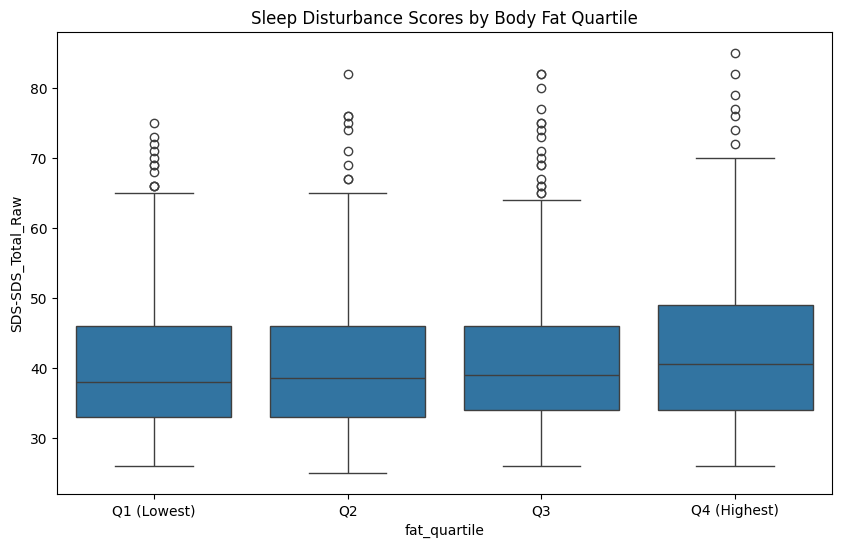

In [ ]:
# Create body fat quartiles
train_df['fat_quartile'] = pd.qcut(train_df['BIA-BIA_Fat'], q=4,
                            labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='fat_quartile', y='SDS-SDS_Total_Raw', data=train_df)
plt.title('Sleep Disturbance Scores by Body Fat Quartile')


ANALYZING THE PREDICTOR VARIABLE

The predictor variable is calculated based on the PCIAT-PCIAT_Total column. The lower and upper limit for each of these sii buckets are described below

In [ ]:
pciat_min_max = train_df.groupby('sii')['PCIAT-PCIAT_Total'].agg(['min', 'max'])
pciat_min_max = pciat_min_max.rename(
    columns={'min': 'Minimum PCIAT total Score', 'max': 'Maximum total PCIAT Score'}
)
pciat_min_max

Minimum PCIAT total Score  Maximum total PCIAT Score
sii                                                      
0.0                        0.0                       30.0
1.0                       31.0                       49.0
2.0                       50.0                       79.0
3.0                       80.0                       93.0

0-30=None
31-49=Mild
50-79=Moderate
80-100=Severe

In [ ]:
train_df['sii'].isna().sum()

1224

In [ ]:
1224/train_df.shape[0]

0.3090909090909091

There are 1224 missing rows for the column 'sii'. i.e, 31% of the predictor column data is missing

In [ ]:
columns_not_in_test=groups.get("Parent-Child Internet Addiction Test")

In [ ]:
train_with_sii = train_df[train_df['sii'].notna()][columns_not_in_test]
train_with_sii[train_with_sii.isna().any(axis=1)].head().style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

<ipython-input-114-f7f71c849d2c>:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  train_with_sii[train_with_sii.isna().any(axis=1)].head().style.applymap(


We have noticed that some of the SII values may have been filled incorrectly. For example, row 1 and row 3 have a missing value (n/a) in one of the PCIAT_x columns. We do not know if this is an error or if that question was not answered etc. However in this case, the sum of the non na values are still taken into consideration which is still leading to potentially invalid SII values.

To check if PCIAT-PCIAT_Total was calculated as a sum of non-NA vlaues for all the PCIAT columns

In [ ]:
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]
recalc_total_score = train_with_sii[PCIAT_cols].sum(
    axis=1, skipna=True
)
(recalc_total_score == train_with_sii['PCIAT-PCIAT_Total']).all()

True

To take care of the above incorrect calculation of the sii variable, we can recalculate the SII score.


why do we do this?
For every missing value under the PCIAT question, there is a max possibility of score 5 of have been potentially the answer in that section. But since we do not know this fact and can never know, we have to recalculate these sii scores to be nan to ensure all ambiguous SII scores are marked as NaN

In [ ]:
def recalculate_sii(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

train_df['recalc_sii'] = train_df.apply(recalculate_sii, axis=1)

In [ ]:
mismatch_rows = train_df[
    (train_df['recalc_sii'] != train_df['sii']) & train_df['sii'].notna()
]

mismatch_rows[PCIAT_cols + [
    'PCIAT-PCIAT_Total', 'sii', 'recalc_sii'
]].style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

<ipython-input-117-61b9b159b76b>:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  ]].style.applymap(


In [ ]:
train_df['sii'] = train_df['recalc_sii']
#dropping the recalc_sii column as it does not serve any purpose as of now

train_df.drop(columns='recalc_sii', inplace=True)

For 17 rows, the target variable was incorrectly calculated

DEMOGRAPHICS

In [ ]:
demographic_data = train_df[['id','Basic_Demos-Enroll_Season','Basic_Demos-Age','Basic_Demos-Sex','sii']]

Distribution across age groups

<ipython-input-120-33e28fa3c944>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['Age_Group'] = pd.cut(demographic_data['Basic_Demos-Age'], bins=bins, labels=labels, right=True)
<ipython-input-120-33e28fa3c944>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='pastel', edgecolor='black')


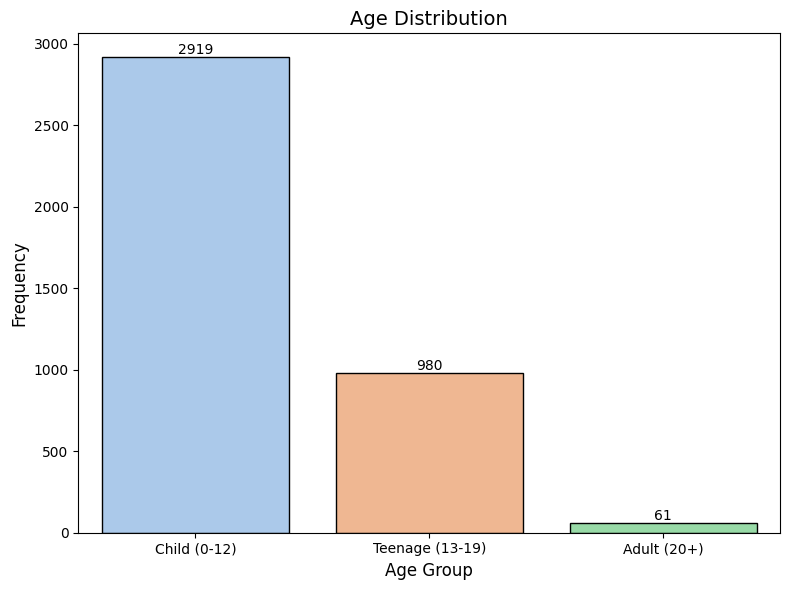

In [ ]:
bins = [0, 12, 19, max(demographic_data['Basic_Demos-Age'])]  # Define bins: 0-12, 13-19, 20+
labels = ['Child (0-12)', 'Teenage (13-19)', 'Adult (20+)']

# Create a new column for the categorized age groups
demographic_data['Age_Group'] = pd.cut(demographic_data['Basic_Demos-Age'], bins=bins, labels=labels, right=True)

# Count occurrences in each age group
age_group_counts = demographic_data['Age_Group'].value_counts(sort=False)


plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='pastel', edgecolor='black')

# Add frequencies on top of the bars
for i, count in enumerate(age_group_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()


Inference : Maximum number of participants in this dataset are children with 2.9k and it is followed by teenagers (980) and a very small portion of the dataset pertains to adults (61).

Changing the Basic_Demos-Sex column from 0,1 to Male,Female for better understanding

In [ ]:
train_df['Basic_Demos-Sex'] = train_df['Basic_Demos-Sex'].replace({0: 'Male', 1: 'Female'})
demographic_data['Basic_Demos-Sex'] = demographic_data['Basic_Demos-Sex'].replace({0: 'Male', 1: 'Female'})

<ipython-input-121-d0ef837d51d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['Basic_Demos-Sex'] = demographic_data['Basic_Demos-Sex'].replace({0: 'Male', 1: 'Female'})


<ipython-input-122-d9a672156434>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=demographic_data, x='Basic_Demos-Sex', palette='coolwarm', edgecolor='black')


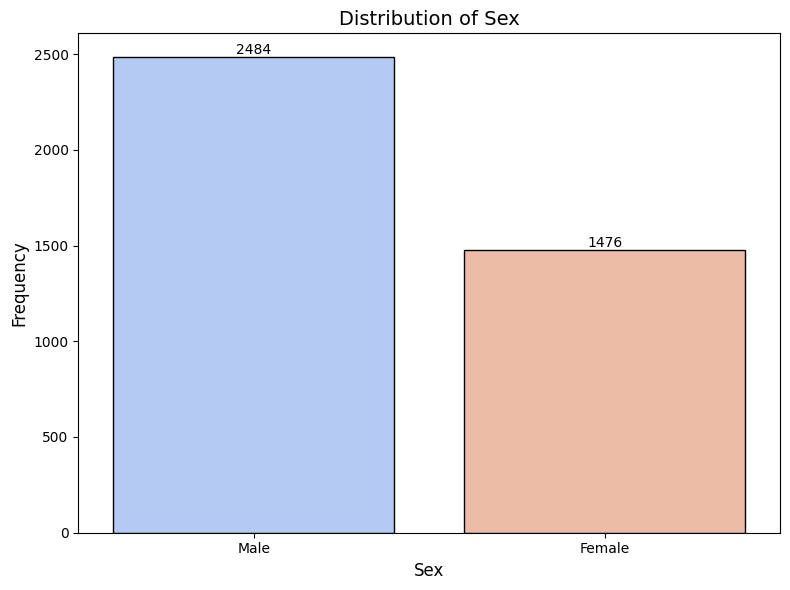

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=demographic_data, x='Basic_Demos-Sex', palette='coolwarm', edgecolor='black')

# Add counts on top of the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        int(bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )


plt.title('Distribution of Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

Inference : Majority of the participants in this dataset are male with close to 2.5k participants and females have close to 1.5k participants.

SII vs Age

<ipython-input-123-03d5aae7ec42>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['Age Bin'] = pd.cut(demographic_data['Basic_Demos-Age'], bins=bins, right=False, labels=labels)
<ipython-input-123-03d5aae7ec42>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_sii = demographic_data.groupby('Age Bin')['sii'].apply(lambda x: x.mode()[0]).reset_index()


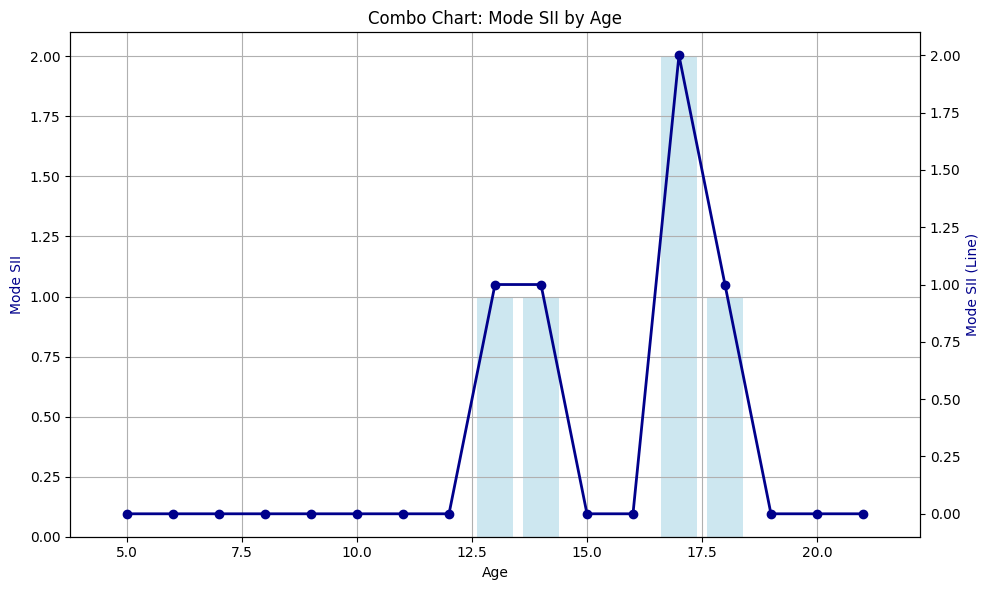

In [ ]:
bins = np.arange(5, 23, 1)  # Creates bins from 5 to 22
labels = bins[:-1]  # Bin labels for x-axis (5 to 21)

# Categorize ages into bins
demographic_data['Age Bin'] = pd.cut(demographic_data['Basic_Demos-Age'], bins=bins, right=False, labels=labels)

# Calculate the mode of SII per age bin
mode_sii = demographic_data.groupby('Age Bin')['sii'].apply(lambda x: x.mode()[0]).reset_index()

# Plotting the combo chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bar chart for mode SII
ax1.bar(mode_sii['Age Bin'], mode_sii['sii'], color='lightblue', label='Mode SII', alpha=0.6)

# Create a second axis to plot the line chart
ax2 = ax1.twinx()
ax2.plot(mode_sii['Age Bin'], mode_sii['sii'], color='darkblue', marker='o', label='Mode SII Line', linestyle='-', linewidth=2)

# Labeling the axes
ax1.set_xlabel('Age')
ax1.set_ylabel('Mode SII', color='darkblue')
ax2.set_ylabel('Mode SII (Line)', color='darkblue')

# Title and grid
plt.title('Combo Chart: Mode SII by Age')
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


Finding : We can see that as age increase , the avg Sii increases consistently and drops once adulthood is reached. This could potentially indiciate higher severeity amongst teens due to increased internet usage and lack of physical activity and overall fitness.

SII vs Sex

In [ ]:
# Check the count of null values in the 'sii' column
null_count_sii = demographic_data['sii'].isnull().sum()

print(f"Count of null values in 'sii' column: {null_count_sii}")

Count of null values in 'sii' column: 1241


Distribution of SII across age for each sex

<ipython-input-125-5b91b2a29a2c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data_clean['Age Bin'] = pd.cut(demographic_data_clean['Basic_Demos-Age'], bins=bins, right=False, labels=labels)
<ipython-input-125-5b91b2a29a2c>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_sii_by_sex_age = demographic_data_clean.groupby(['Basic_Demos-Sex', 'Age Bin'])['sii'].apply(lambda x: x.mode()[0]).reset_index()


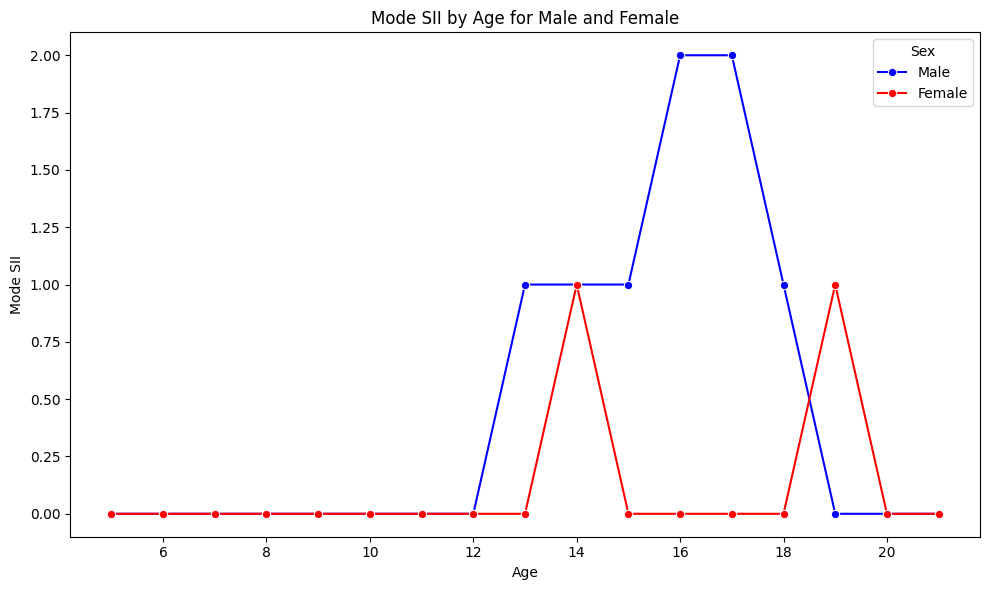

In [ ]:
demographic_data_clean = demographic_data[demographic_data['sii'].notnull() & demographic_data['Basic_Demos-Age'].notnull()]

# Binning ages between 5 and 22
bins = np.arange(5, 23, 1)  # Creates bins from 5 to 22
labels = bins[:-1]  # Bin labels for x-axis (5 to 21)

# Categorize ages into bins
demographic_data_clean['Age Bin'] = pd.cut(demographic_data_clean['Basic_Demos-Age'], bins=bins, right=False, labels=labels)

# Group by sex and age bin, and calculate the mode of 'sii' for each group
mode_sii_by_sex_age = demographic_data_clean.groupby(['Basic_Demos-Sex', 'Age Bin'])['sii'].apply(lambda x: x.mode()[0]).reset_index()

# Create separate dataframes for Male and Female
mode_sii_male = mode_sii_by_sex_age[mode_sii_by_sex_age['Basic_Demos-Sex'] == 'Male']
mode_sii_female = mode_sii_by_sex_age[mode_sii_by_sex_age['Basic_Demos-Sex'] == 'Female']

# Plotting
plt.figure(figsize=(10, 6))

# Plotting line for Male
sns.lineplot(data=mode_sii_male, x='Age Bin', y='sii', label='Male', marker='o', color='blue')

# Plotting line for Female
sns.lineplot(data=mode_sii_female, x='Age Bin', y='sii', label='Female', marker='o', color='red')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Mode SII')
plt.title('Mode SII by Age for Male and Female')

# Display the legend
plt.legend(title='Sex')

# Show the plot
plt.tight_layout()
plt.show()

Findings : we observe a relatively consistent increase in the average sii for both sexes as age increases. However, from the age of 17, we observe the average sii to drop drastically in males where as in females, the sii actually increases until the age of 19.

Number of participants enrolled season wise

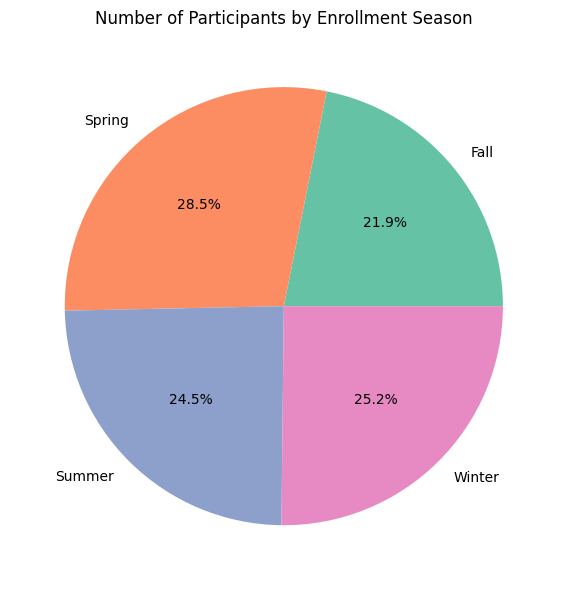

In [ ]:
# Remove rows with null values in 'Basic_Demos-Enroll_Season' and 'id'
demographic_data_clean = demographic_data[demographic_data['Basic_Demos-Enroll_Season'].notnull() & demographic_data['id'].notnull()]

# Group by 'Basic_Demos-Enroll_Season' and count the number of participants (id)
season_counts = demographic_data_clean.groupby('Basic_Demos-Enroll_Season')['id'].count()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(season_counts)))

# Adding title
plt.title('Number of Participants by Enrollment Season')

# Show the plot
plt.tight_layout()
plt.show()

INTERNET USE

In [ ]:
internet_df = train_df[['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex','PreInt_EduHx-Season',
       'PreInt_EduHx-computerinternet_hoursday','sii']]

Distribution of internet usage per day

<ipython-input-128-9e5e72e52fce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


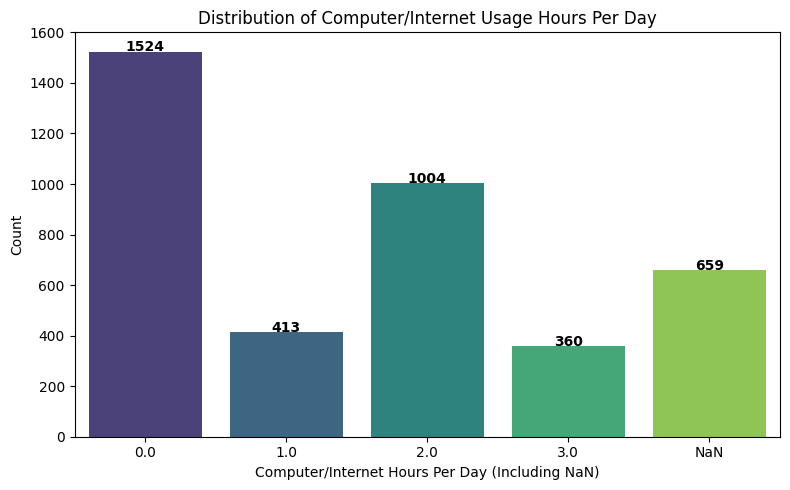

In [ ]:
# Replace NaN with the string 'NaN'
data_with_nan = internet_df['PreInt_EduHx-computerinternet_hoursday'].fillna('NaN').astype(str)

# Count occurrences of each category
value_counts = data_with_nan.value_counts().sort_index(key=lambda x: x.map(lambda v: float(v) if v != 'NaN' else float('inf')))

# Plotting a bar graph using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Adding value annotations on top of each bar
for i, val in enumerate(value_counts.values):
    plt.text(i, val + 0.5, int(val), ha='center', fontweight='bold')

# Labeling the axes
plt.xlabel('Computer/Internet Hours Per Day (Including NaN)')
plt.ylabel('Count')

# Adding a title
plt.title('Distribution of Computer/Internet Usage Hours Per Day')

# Show the plot
plt.tight_layout()
plt.show()

Finding: majority of the participants have less than an hour of internet usage followed by people who watch 2 or more hours.

distribution of age within 0, 1 , 2 and 3 hours/day of internet usage

<ipython-input-129-9a855cc8f290>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Count', data=age_counts_df, ax=axes[i], palette="viridis")
<ipython-input-129-9a855cc8f290>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Count', data=age_counts_df, ax=axes[i], palette="viridis")
<ipython-input-129-9a855cc8f290>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Count', data=age_counts_df, ax=axes[i], palette="viridis")
<ipython-input-129-9a855cc8f290>:22: FutureWarning: 

Passing `palette` without assig

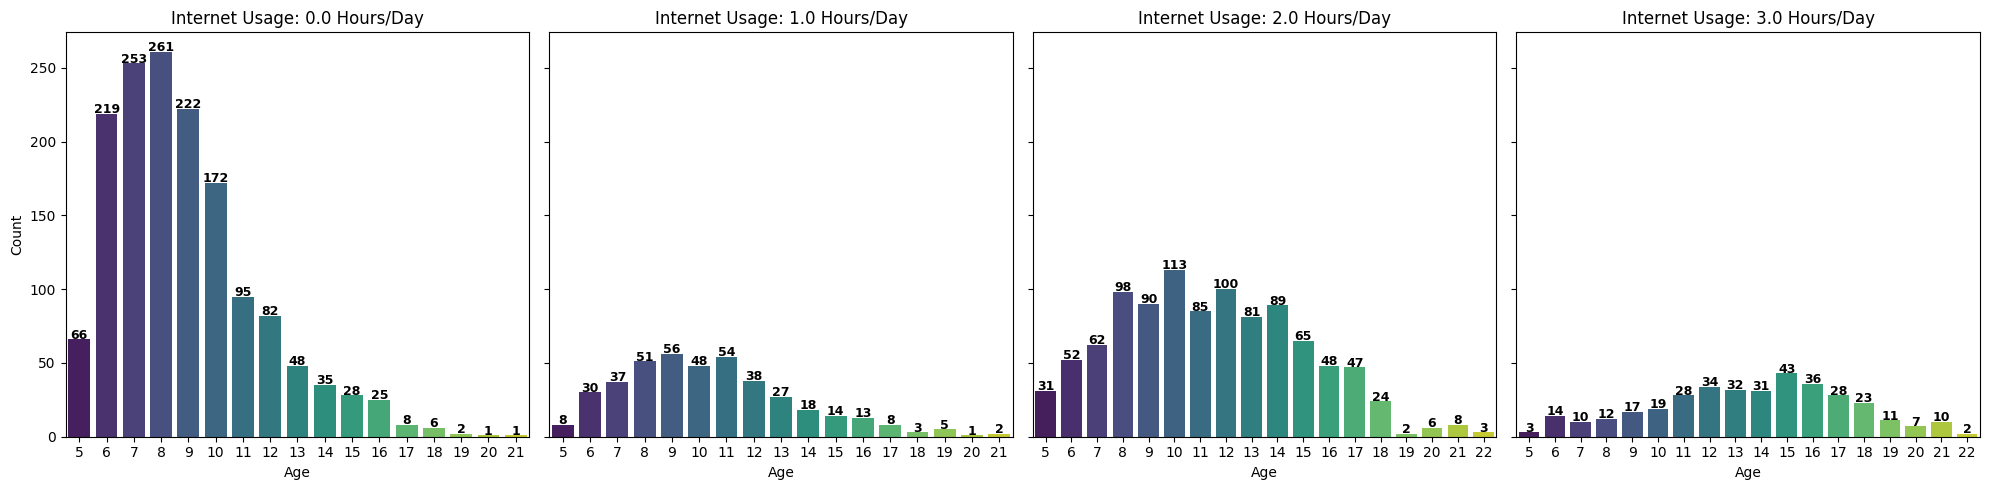

In [ ]:
# Drop rows with NaN in the specified column
internet_df_cleaned = internet_df.dropna(subset=['PreInt_EduHx-computerinternet_hoursday'])

# Filter unique values in the column
unique_values = sorted(internet_df_cleaned['PreInt_EduHx-computerinternet_hoursday'].unique())

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, value in enumerate(unique_values):
    # Filter data for the current value
    filtered_data = internet_df_cleaned[internet_df_cleaned['PreInt_EduHx-computerinternet_hoursday'] == value]

    # Count occurrences of each age
    age_counts = filtered_data['Basic_Demos-Age'].value_counts().sort_index()

    # Convert to DataFrame for Seaborn
    age_counts_df = age_counts.reset_index()
    age_counts_df.columns = ['Age', 'Count']

    # Plot
    sns.barplot(x='Age', y='Count', data=age_counts_df, ax=axes[i], palette="viridis")

    # Set title and labels for each subplot
    axes[i].set_title(f'Internet Usage: {value} Hours/Day')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Count' if i == 0 else '')  # Add Y-axis label only for the first plot

    # Add value annotations
    for index, row in age_counts_df.iterrows():
        axes[i].text(index, row['Count'] + 0.5, int(row['Count']), ha='center', fontweight='bold', fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
train_df['PreInt_EduHx-computerinternet_hoursday'].value_counts()

PreInt_EduHx-computerinternet_hoursday
0.0    1524
2.0    1004
1.0     413
3.0     360
Name: count, dtype: int64

1. Majority of participants have internet usage time of 0 hour and 2 hours a day
2. Most of the data for internet usage is skewed, suggesting that majority of the internet consumption is coming from children and early teens


How much of these age groups are male and female?

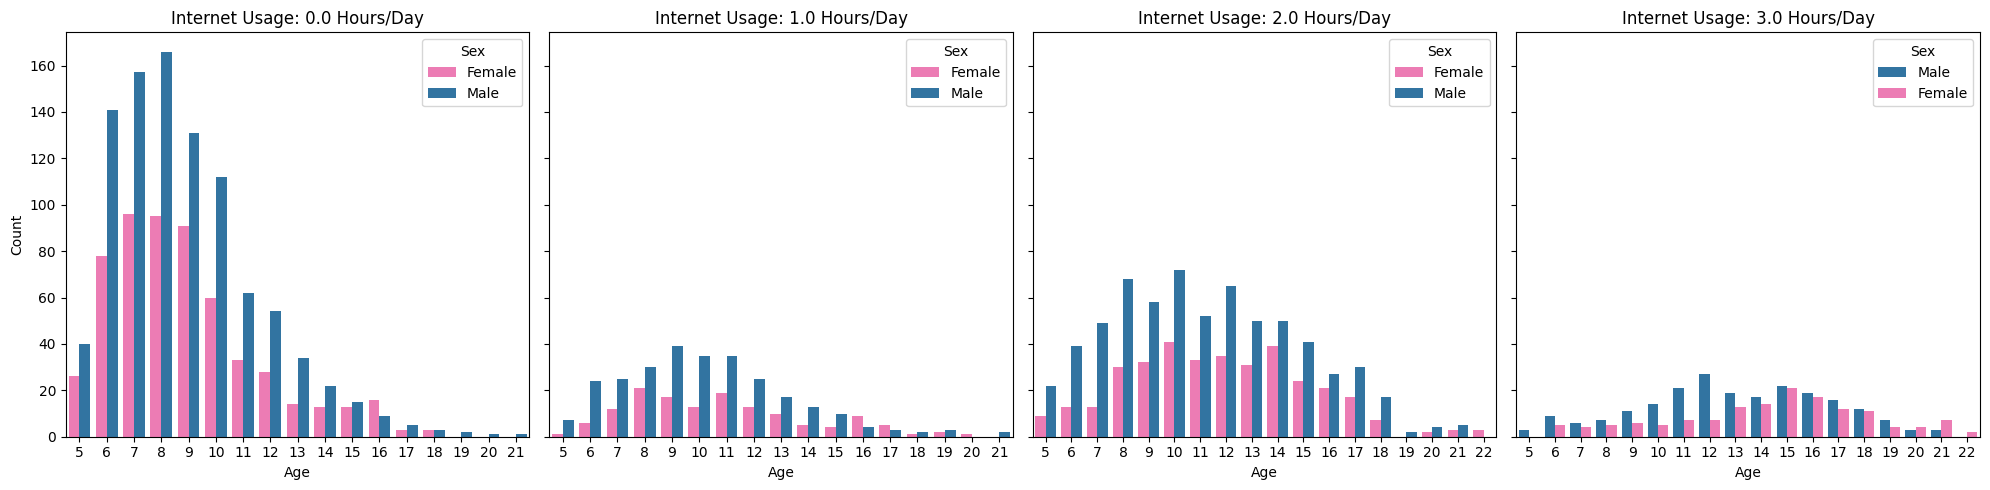

In [ ]:
# Drop rows with NaN in the specified column
internet_df_cleaned = internet_df.dropna(subset=['PreInt_EduHx-computerinternet_hoursday'])

# Filter unique values in the column
unique_values = sorted(internet_df_cleaned['PreInt_EduHx-computerinternet_hoursday'].unique())

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Custom palette for Male (dark blue) and Female (light pink)
custom_palette = {'Male': '#1f77b4', 'Female': '#ff69b4'}

for i, value in enumerate(unique_values):
    # Filter data for the current value
    filtered_data = internet_df_cleaned[internet_df_cleaned['PreInt_EduHx-computerinternet_hoursday'] == value]

    # Group by age and sex to count occurrences
    age_sex_counts = (
        filtered_data.groupby(['Basic_Demos-Age', 'Basic_Demos-Sex'])
        .size()
        .reset_index(name='Count')
    )

    # Plot
    sns.barplot(
        x='Basic_Demos-Age',
        y='Count',
        hue='Basic_Demos-Sex',
        data=age_sex_counts,
        ax=axes[i],
        palette=custom_palette
    )

    # Set title and labels for each subplot
    axes[i].set_title(f'Internet Usage: {value} Hours/Day')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Count' if i == 0 else '')  # Add Y-axis label only for the first plot

    # Adjust legend for each subplot
    axes[i].legend(title='Sex', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

Findings :  Male children and male early teens spend a lot more time using the computer/internet as compared to female children and female early teens.

Internet usage vs mean SII

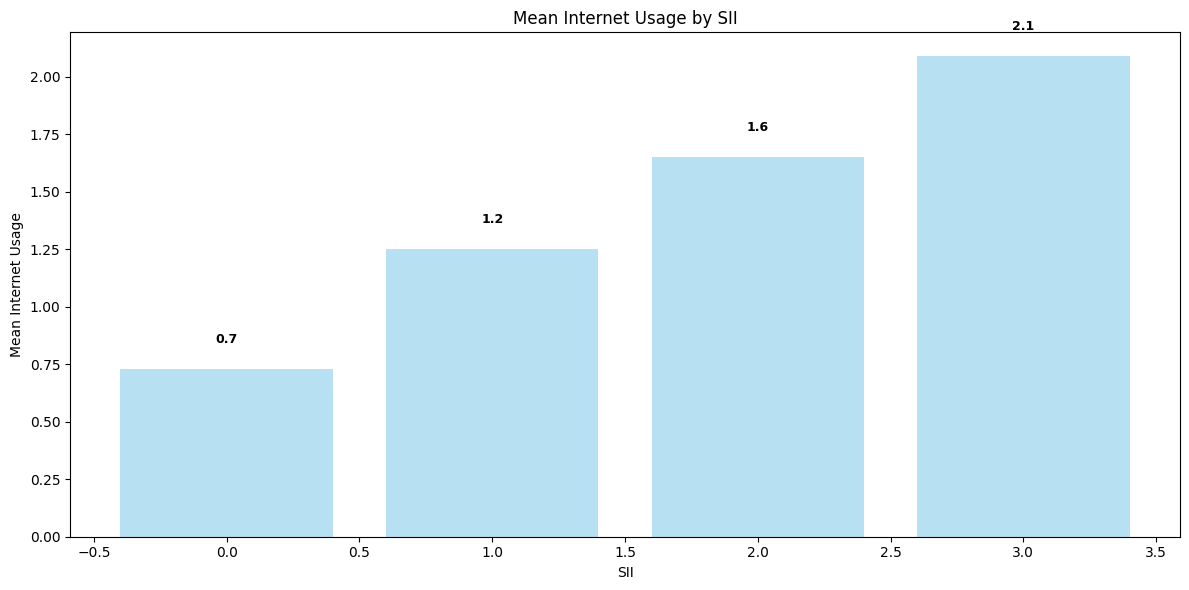

In [ ]:
# Drop rows with NaN values in both Age, Internet Usage, and SII columns
cleaned_data = internet_df.dropna(subset=['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday', 'sii'])

# Group data by SII value
grouped_data = cleaned_data.groupby('sii').agg(
    mean_internet_usage=('PreInt_EduHx-computerinternet_hoursday', 'mean')
).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Mean Internet Usage, now with SII values on the x-axis
ax1.bar(
    grouped_data['sii'],
    grouped_data['mean_internet_usage'],
    color='skyblue',
    label='Mean Internet Usage',
    alpha=0.6
)

# Adding labels to the bar plot
for i, usage in enumerate(grouped_data['mean_internet_usage']):
    ax1.text(
        grouped_data['sii'][i],
        usage + 0.1,
        f'{usage:.1f}',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=9
    )

# Adding labels and titles
ax1.set_xlabel('SII')
ax1.set_ylabel('Mean Internet Usage')
plt.title('Mean Internet Usage by SII')

# Show the plot
plt.tight_layout()
plt.show()

Finding : we can clearly see a positive correlation between internet usage and average sii. Those who use the internet for long hours, tend to have a higher sii score

Distribution of SII across age, with avg internet usage of that age group

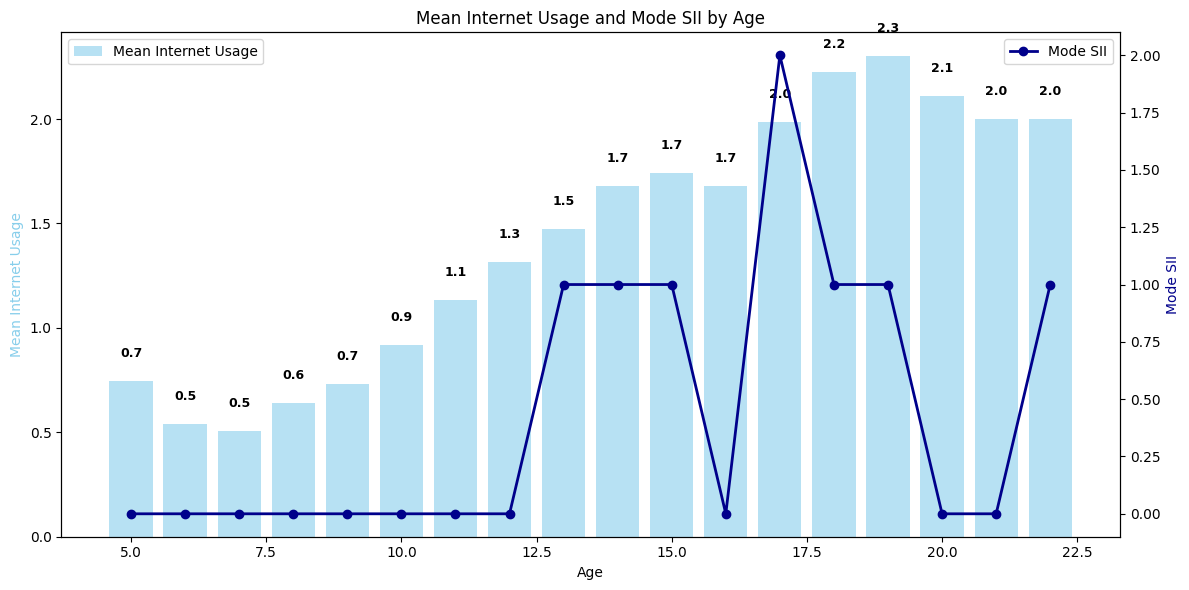

In [ ]:
# Drop rows with NaN values in both Age, Internet Usage, and SII columns
cleaned_data = internet_df.dropna(subset=['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday', 'sii'])

# Group data by Age and calculate the mode of SII
grouped_data = cleaned_data.groupby('Basic_Demos-Age').agg(
    mode_sii=('sii', lambda x: x.mode()[0]),
    mean_internet_usage=('PreInt_EduHx-computerinternet_hoursday', 'mean')
).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Mean Internet Usage
ax1.bar(
    grouped_data['Basic_Demos-Age'],
    grouped_data['mean_internet_usage'],
    color='skyblue',
    label='Mean Internet Usage',
    alpha=0.6
)

# Line plot for Mode SII
ax2 = ax1.twinx()
ax2.plot(
    grouped_data['Basic_Demos-Age'],
    grouped_data['mode_sii'],
    color='darkblue',
    marker='o',
    label='Mode SII',
    linewidth=2
)

# Adding labels to the bar plot
for i, usage in enumerate(grouped_data['mean_internet_usage']):
    ax1.text(
        grouped_data['Basic_Demos-Age'][i],
        usage + 0.1,
        f'{usage:.1f}',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=9
    )

# Adding labels and titles
ax1.set_xlabel('Age')
ax1.set_ylabel('Mean Internet Usage', color='skyblue')
ax2.set_ylabel('Mode SII', color='darkblue')
plt.title('Mean Internet Usage and Mode SII by Age')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

1. Internet usage and SII levels show some parallel increases during teenage years
2. Both metrics peak during late adolescence
3. The relationship suggests potential connections between internet usage and inflammation levels during developmental stages

Internet usage vs SII

<ipython-input-134-8061d904d454>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Internet Usage Category'] = pd.cut(cleaned_data['PreInt_EduHx-computerinternet_hoursday'], bins=bins, labels=labels, right=False)


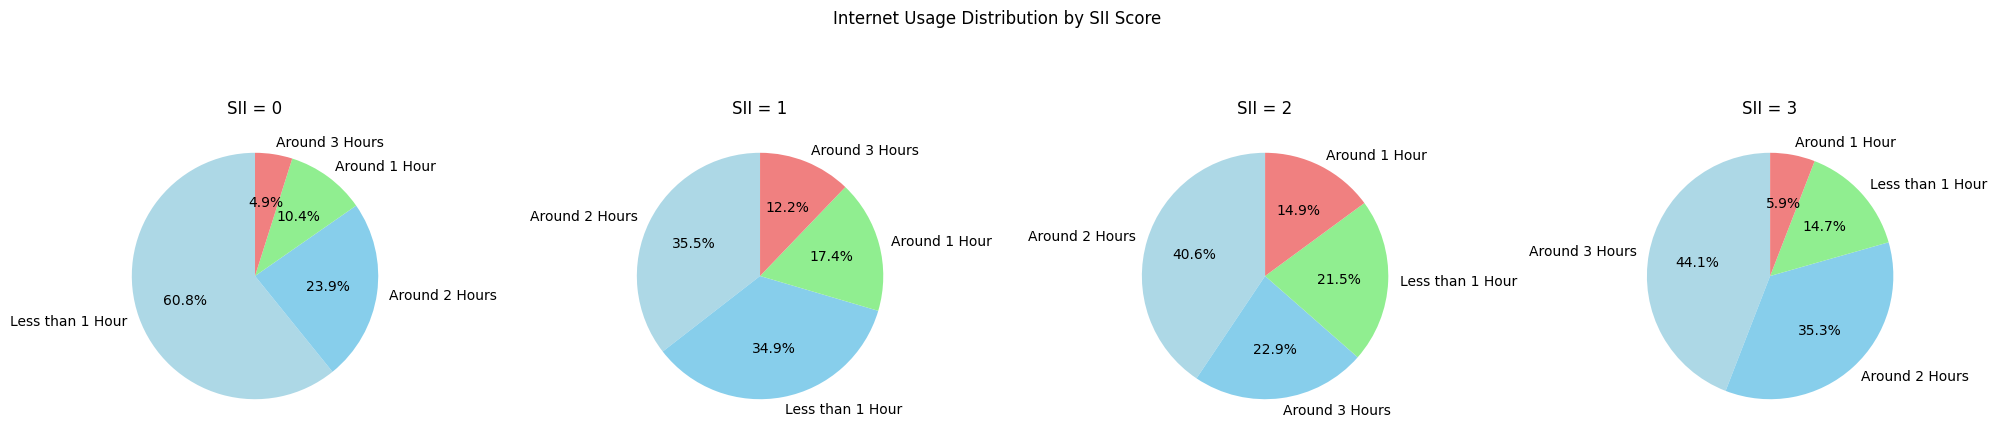

In [ ]:
# Drop rows with NaN values in both SII and Internet Usage columns
cleaned_data = internet_df.dropna(subset=['PreInt_EduHx-computerinternet_hoursday', 'sii'])

# Define categories for internet usage based on the new labels
bins = [0, 1, 2, 3, float('inf')]  # Bins for <1 hour, around 1 hour, around 2 hours, around 3 hours
labels = ['Less than 1 Hour', 'Around 1 Hour', 'Around 2 Hours', 'Around 3 Hours']  # New labels for usage

# Create a new column that categorizes internet usage
cleaned_data['Internet Usage Category'] = pd.cut(cleaned_data['PreInt_EduHx-computerinternet_hoursday'], bins=bins, labels=labels, right=False)

# Initialize the figure for pie charts
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 4 pie charts, one for each SII score
fig.suptitle('Internet Usage Distribution by SII Score')

# Loop through each SII score (0, 1, 2, 3)
for i, sii_score in enumerate([0, 1, 2, 3]):
    # Filter the data for the current SII score
    sii_data = cleaned_data[cleaned_data['sii'] == sii_score]

    # Get the distribution of internet usage categories for the current SII score
    usage_distribution = sii_data['Internet Usage Category'].value_counts(normalize=True) * 100  # Percentages

    # Plot the pie chart for the current SII score
    axes[i].pie(usage_distribution, labels=usage_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'skyblue', 'lightgreen', 'lightcoral'])
    axes[i].set_title(f'SII = {sii_score}')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap with the title
plt.show()

SII = 0
1. Majority (60.8%) use internet less than 1 hour
2. 23.9% use around 2 hours
3. Only 15.3% use 3 hours or more
4. Shows healthiest internet usage pattern


SII = 1
1. More evenly distributed usage
2. 35.5% use around 2 hours
3. 34.9% use less than 1 hour
4. 29.6% use 3 hours or more
5. Shows increased internet usage compared to SII=0

SII = 2
1. 40.6% use around 2 hours
2. Higher proportion (22.9%) using around 3 hours
3. Only 21.5% use around 1 hour
4. Shows further increase in usage duration


SII = 3
1. 44.1% use around 2 hours
2. 35.3% use around 3 hours
3. Only 20.6% use 1 hour or less
4. Shows highest proportion of extended internet usage


This visualization suggests a clear relationship between internet usage duration and inflammation levels, with higher SII scores corresponding to longer daily internet usage patterns.


FITNESS GRAM

In [ ]:
fitnessgram_data = train_df[['id','Basic_Demos-Age','Basic_Demos-Sex','Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'sii']]

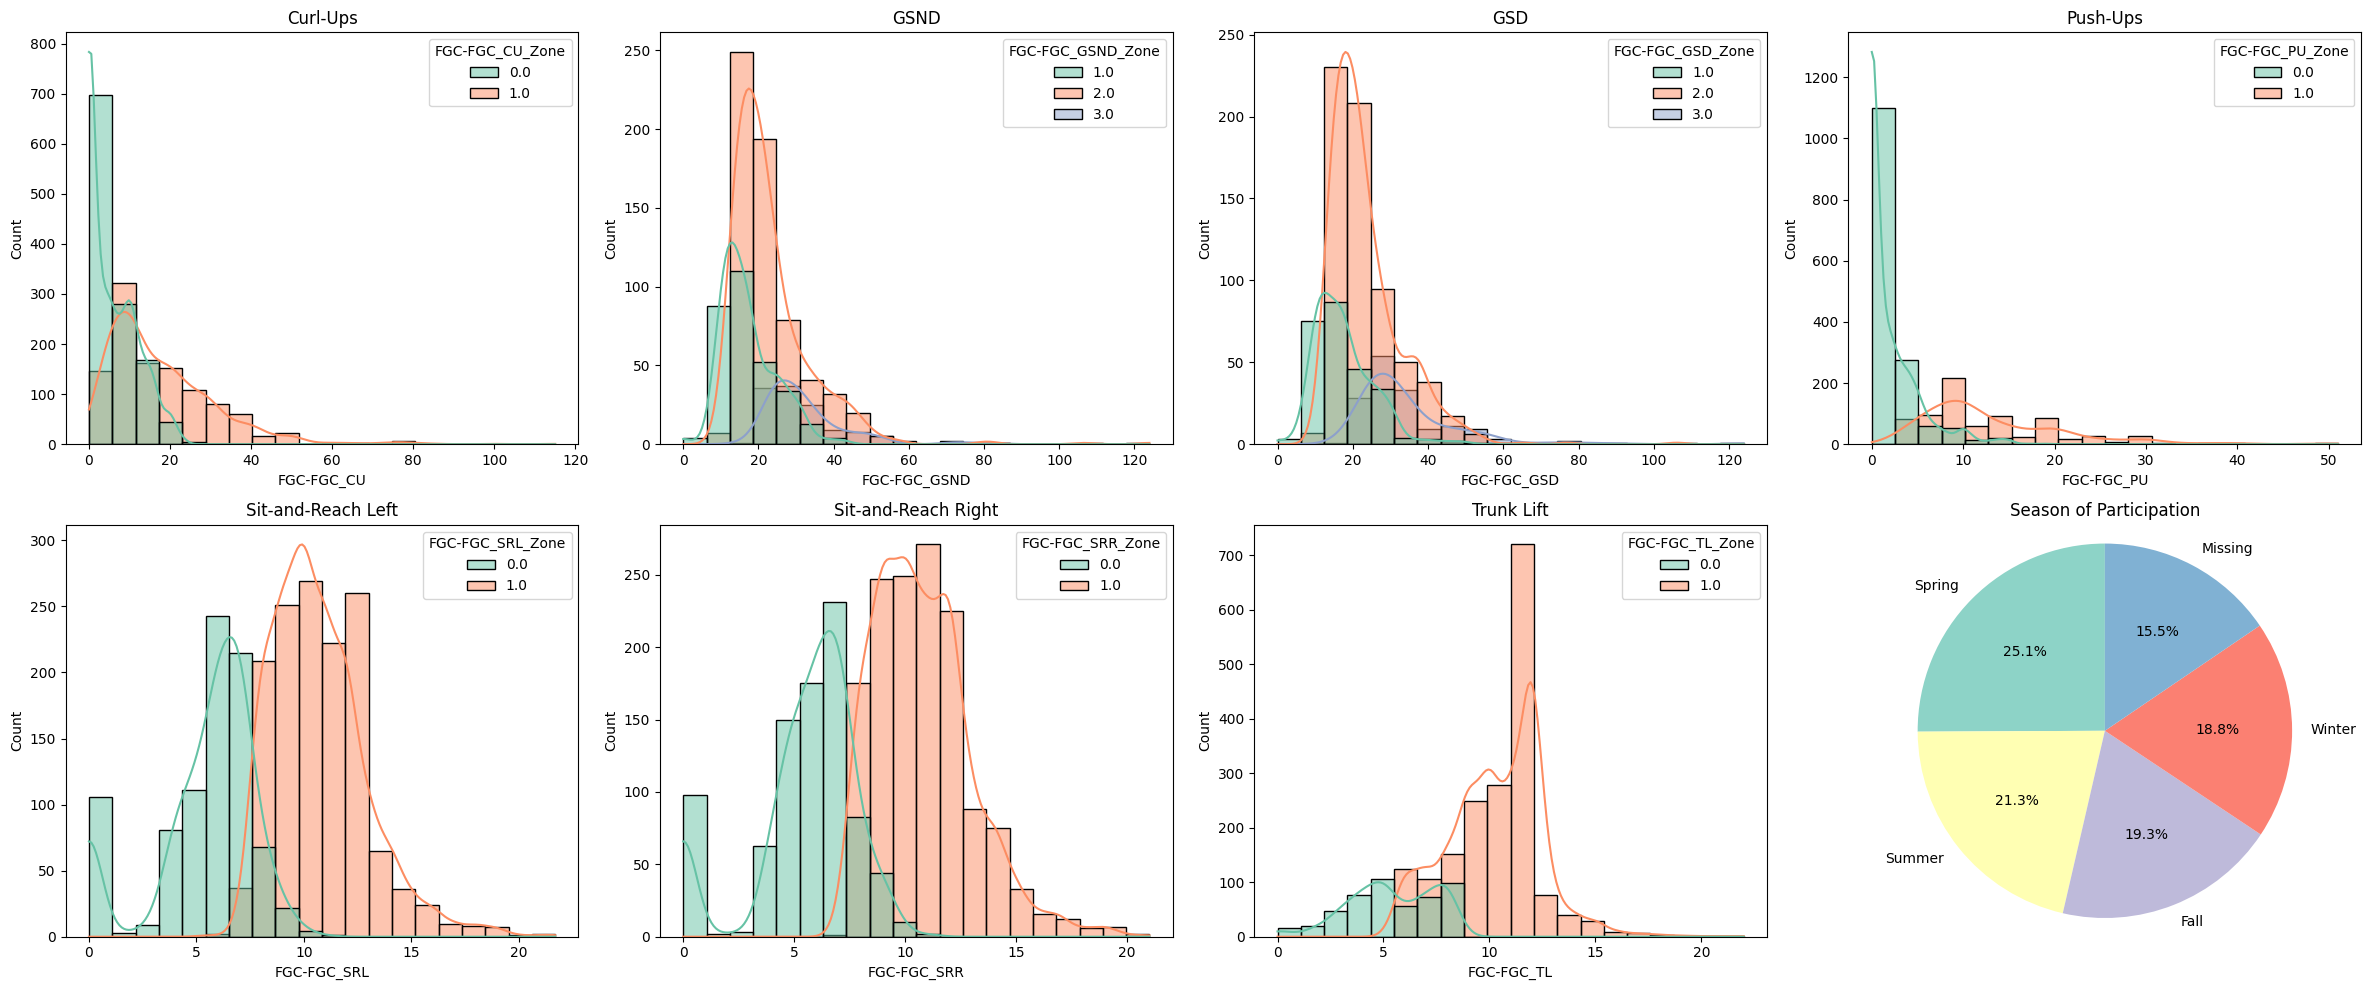

In [ ]:
# Define the FitnessGram Child columns and descriptions (manually created based on our discussion)
fgc_columns = [
    ("FGC-FGC_CU", "FGC-FGC_CU_Zone", "Curl-Ups", "Curl-Ups Zone"),
    ("FGC-FGC_GSND", "FGC-FGC_GSND_Zone", "GSND", "GSND Zone"),
    ("FGC-FGC_GSD", "FGC-FGC_GSD_Zone", "GSD", "GSD Zone"),
    ("FGC-FGC_PU", "FGC-FGC_PU_Zone", "Push-Ups", "Push-Ups Zone"),
    ("FGC-FGC_SRL", "FGC-FGC_SRL_Zone", "Sit-and-Reach Left", "Sit-and-Reach Left Zone"),
    ("FGC-FGC_SRR", "FGC-FGC_SRR_Zone", "Sit-and-Reach Right", "Sit-and-Reach Right Zone"),
    ("FGC-FGC_TL", "FGC-FGC_TL_Zone", "Trunk Lift", "Trunk Lift Zone"),
]

# Create the subplots
fig, axes = plt.subplots(2, 4, figsize=(24, 10))

# Generate histograms for measure-zone pairs
for idx, (measure, zone, measure_desc, zone_desc) in enumerate(fgc_columns):
    row = idx // 4
    col = idx % 4

    sns.histplot(
        data=fitnessgram_data, x=measure, hue=zone, bins=20, palette='Set2',
        ax=axes[row, col], kde=True
    )
    axes[row, col].set_title(f'{measure_desc}')

# Create a pie chart for FGC-Season
season_counts = fitnessgram_data['FGC-Season'].value_counts(normalize=True)
axes[1, 3].pie(
    season_counts, labels=season_counts.index,
    autopct='%1.1f%%', startangle=90,
    colors=sns.color_palette("Set3")
)
axes[1, 3].set_title('Season of Participation')
axes[1, 3].axis('equal')  # Equal aspect ratio for a perfect circle

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


As we see in the plots above, there is an overlap between the zones (1,2 and 3). For example: For the curl up exercise, zone 1 is defined as 0-10, however zone 2 is defined as 6-20. This overlap causes errors and confusion

To fix this, we define new zones as mentioned here : https://pftdata.org/files/hfz-standards.pdf, to create a distinction between the zones so that a clear analysis can be done.

In [ ]:
def create_fitness_zones_mapping():
    # Define HFZ standards for females
    female_standards = {
        'curl_up': {
            # age: min_value for HFZ
            5: 2, 6: 2, 7: 4, 8: 6, 9: 9, 10: 12,
            11: 15, 12: 18, 13: 18, 14: 18, 15: 18,
            16: 18, 17: 18
        },
        'push_up': {
            5: 3, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7,
            11: 7, 12: 7, 13: 7, 14: 7, 15: 7,
            16: 7, 17: 7
        },
        'trunk_lift': {
            # age: (min_value, max_value) for HFZ
            5: (6, 12), 6: (6, 12), 7: (6, 12), 8: (6, 12), 9: (6, 12),
            10: (9, 12), 11: (9, 12), 12: (9, 12), 13: (9, 12), 14: (9, 12),
            15: (9, 12), 16: (9, 12), 17: (9, 12)
        },
        'sit_and_reach': {
            5: 9, 6: 9, 7: 9, 8: 9, 9: 9, 10: 9,
            11: 10, 12: 10, 13: 10, 14: 10, 15: 12,
            16: 12, 17: 12
        }
    }

    # Define HFZ standards for males
    male_standards = {
        'curl_up': {
            5: 2, 6: 2, 7: 4, 8: 6, 9: 9, 10: 12,
            11: 15, 12: 18, 13: 21, 14: 24, 15: 24,
            16: 24, 17: 24
        },
        'push_up': {
            5: 3, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7,
            11: 8, 12: 10, 13: 12, 14: 14, 15: 16,
            16: 18, 17: 18
        },
        'trunk_lift': {
            5: (6, 12), 6: (6, 12), 7: (6, 12), 8: (6, 12), 9: (6, 12),
            10: (9, 12), 11: (9, 12), 12: (9, 12), 13: (9, 12), 14: (9, 12),
            15: (9, 12), 16: (9, 12), 17: (9, 12)
        },
        'sit_and_reach': {
            5: 8, 6: 8, 7: 8, 8: 8, 9: 8, 10: 8,
            11: 8, 12: 8, 13: 8, 14: 8, 15: 8,
            16: 8, 17: 8
        }
    }

    return female_standards, male_standards

def assign_fitness_zones(df):
    female_standards, male_standards = create_fitness_zones_mapping()

    # Create new columns for zones
    df['curl_up_zone'] = 'NI'  # NI = Needs Improvement
    df['push_up_zone'] = 'NI'
    df['trunk_lift_zone'] = 'NI'
    df['sit_and_reach_zone'] = 'NI'

    # Assign zones based on sex and age
    for idx, row in df.iterrows():
        age = row['Basic_Demos-Age']
        sex = row['Basic_Demos-Sex']

        # Round age to nearest integer and clip to 17
        age = min(int(round(age)), 17)

        standards = female_standards if sex == 'F' else male_standards

        # Curl-ups
        if row['FGC-FGC_CU'] >= standards['curl_up'][age]:
            df.at[idx, 'curl_up_zone'] = 'HFZ'

        # Push-ups
        if row['FGC-FGC_PU'] >= standards['push_up'][age]:
            df.at[idx, 'push_up_zone'] = 'HFZ'

        # Trunk lift
        min_trunk, max_trunk = standards['trunk_lift'][age]
        if min_trunk <= row['FGC-FGC_TL'] <= max_trunk:
            df.at[idx, 'trunk_lift_zone'] = 'HFZ'

        # Sit and reach (using right side as example)
        if row['FGC-FGC_SRR'] >= standards['sit_and_reach'][age]:
            df.at[idx, 'sit_and_reach_zone'] = 'HFZ'

    return df

# Apply the zones
train_df = assign_fitness_zones(fitnessgram_data)

# Display zone distribution
for zone_col in ['curl_up_zone', 'push_up_zone', 'trunk_lift_zone', 'sit_and_reach_zone']:
    print(f"\nDistribution of {zone_col}:")
    print(train_df[zone_col].value_counts(normalize=True) * 100)

<ipython-input-137-a8d59711a24f>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['curl_up_zone'] = 'NI'  # NI = Needs Improvement
<ipython-input-137-a8d59711a24f>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['push_up_zone'] = 'NI'
<ipython-input-137-a8d59711a24f>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable


Distribution of curl_up_zone:
curl_up_zone
NI     75.025253
HFZ    24.974747
Name: proportion, dtype: float64

Distribution of push_up_zone:
push_up_zone
NI     83.106061
HFZ    16.893939
Name: proportion, dtype: float64

Distribution of trunk_lift_zone:
trunk_lift_zone
NI     59.318182
HFZ    40.681818
Name: proportion, dtype: float64

Distribution of sit_and_reach_zone:
sit_and_reach_zone
NI     62.222222
HFZ    37.777778
Name: proportion, dtype: float64


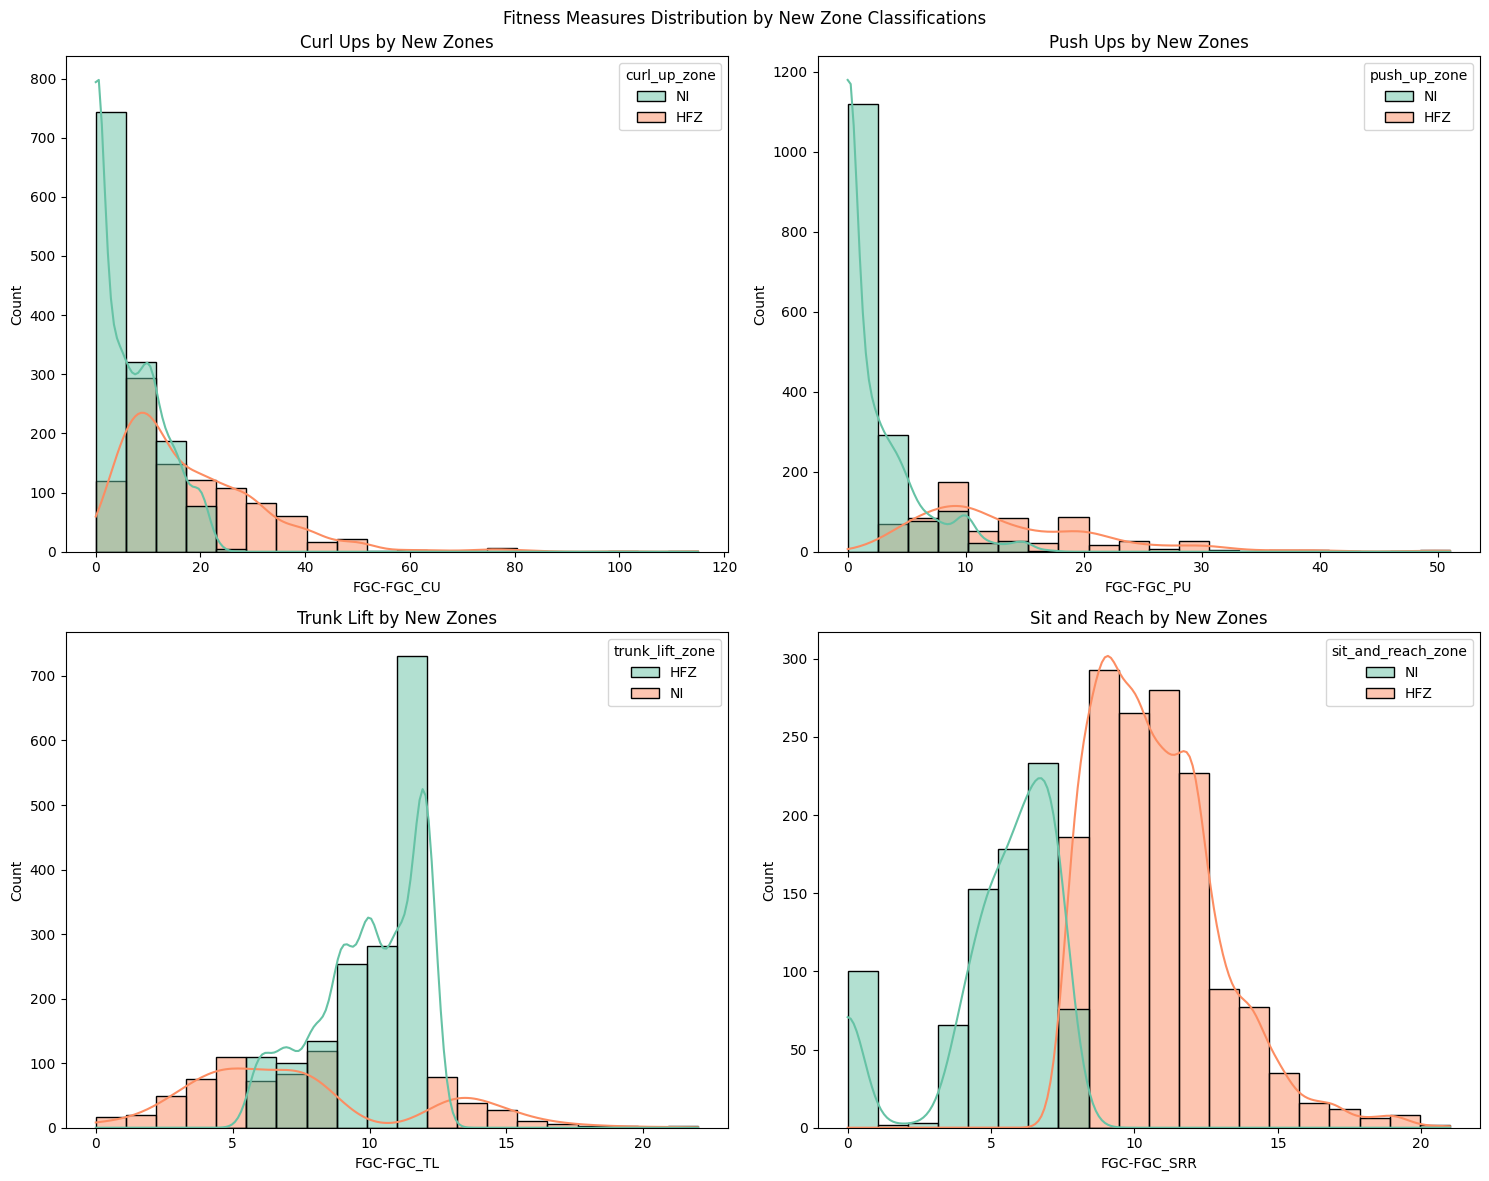

In [ ]:
# Create plots with new zone mappings
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Fitness Measures Distribution by New Zone Classifications')

# Curl Ups with new zones
sns.histplot(
    data=fitnessgram_data, x='FGC-FGC_CU',
    hue='curl_up_zone', bins=20,
    palette='Set2', ax=axes[0,0],
    kde=True
)
axes[0,0].set_title('Curl Ups by New Zones')

# Push Ups with new zones
sns.histplot(
    data=fitnessgram_data, x='FGC-FGC_PU',
    hue='push_up_zone', bins=20,
    palette='Set2', ax=axes[0,1],
    kde=True
)
axes[0,1].set_title('Push Ups by New Zones')

# Trunk Lift with new zones
sns.histplot(
    data=fitnessgram_data, x='FGC-FGC_TL',
    hue='trunk_lift_zone', bins=20,
    palette='Set2', ax=axes[1,0],
    kde=True
)
axes[1,0].set_title('Trunk Lift by New Zones')

# Sit and Reach with new zones
sns.histplot(
    data=fitnessgram_data, x='FGC-FGC_SRR',
    hue='sit_and_reach_zone', bins=20,
    palette='Set2', ax=axes[1,1],
    kde=True
)
axes[1,1].set_title('Sit and Reach by New Zones')

plt.tight_layout()
plt.show()